# Baseball Case Study (Evaluation Project -1)

Problem Statement:-

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

# For downloading the dataset, use the link given below. 

Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/baseball.csv

# Importing Libraries

In [1]:
#importing all the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
import warnings 
warnings.filterwarnings('ignore')


Importing Dataset of Baseball

In [2]:
data = pd.read_csv('Baseball.csv')
data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
# Checking Shape of dataset

data.shape

(30, 17)

Observation:

Dataset is consist of 30 rows and 17 columns.

In [4]:
# Checking Names of Columns
data.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

Observations:-

Here we can see that columns names are in abbrevated form which is not making any sense,So the details of columns we are finding with help of wikipedia (https://en.wikipedia.org/wiki/Baseball_statistics).

    
W – Win: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work (also related: winning percentage).

R – Runs scored: times reached home plate legally and safely.

AB – At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction.

H – Hit: reaching base because of a batted, fair ball without error by the defense.

2B – Double: hits on which the batter reaches second base safely without the contribution of a fielding error.

3B – Triple: hits on which the batter reaches third base safely without the contribution of a fielding error.

HR – Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error.

BB – Base on balls (also called a "walk"): hitter not swinging at four pitches called out of the strike zone and awarded first base.

PA/SO – Plate appearances per strikeout: number of times a batter strikes out to their plate appearance.

SB – Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense.

RA – Run average: number of runs allowER" above), multiplied by 9, divided by innings pitched.

CG – Complete game: number of games where player was the only pitcher for their team.

SHO – Shutout: number of complete games pitched with no runs allowed.

SV – Save: number of games where the pitcher eed times nine divided by innings pitched.

ER – Earned run: number of runs that did not occur as a result of errors or passed balls.

ERA – Earned run average: total number of earned runs (see "nters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings.

E – Errors: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result.    

# Replacing abbrevations with complete names so it will be helpful to understand

In [5]:
# Renaming Column names

data.columns=['Wins', 'Runs', 'At_Bats', 'Hits', 'Doubles', 'Triples', 'Homeruns', 'Walks'
              , 'Strikeouts', 'Stolen_Bases', 'Runs_Allowed', 'Earned_Runs', 'Earned_Run_Average_(ERA)'
              ,  'Complete_Games', 'Shutouts', 'Saves', 'Errors']
data.head()


,Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average_(ERA),Complete_Games,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


# Exploratory Data Analysis

In [6]:
# Checking head of dataset(first 5 rows)
data.head()

,Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average_(ERA),Complete_Games,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [7]:
# Checking tail of dataset(bottom 5 rows)
data.tail()

,Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average_(ERA),Complete_Games,Shutouts,Saves,Errors
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [8]:
# Checking Info of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Wins                      30 non-null     int64  
 1   Runs                      30 non-null     int64  
 2   At_Bats                   30 non-null     int64  
 3   Hits                      30 non-null     int64  
 4   Doubles                   30 non-null     int64  
 5   Triples                   30 non-null     int64  
 6   Homeruns                  30 non-null     int64  
 7   Walks                     30 non-null     int64  
 8   Strikeouts                30 non-null     int64  
 9   Stolen_Bases              30 non-null     int64  
 10  Runs_Allowed              30 non-null     int64  
 11  Earned_Runs               30 non-null     int64  
 12  Earned_Run_Average_(ERA)  30 non-null     float64
 13  Complete_Games            30 non-null     int64  
 14  Shutouts    

There are total 30 entries from 0 to 29.
16 columns are  in integer type and 1 column is float type.

In [9]:
# Checking columns data types of dataset
data.dtypes


Wins                          int64
Runs                          int64
At_Bats                       int64
Hits                          int64
Doubles                       int64
Triples                       int64
Homeruns                      int64
Walks                         int64
Strikeouts                    int64
Stolen_Bases                  int64
Runs_Allowed                  int64
Earned_Runs                   int64
Earned_Run_Average_(ERA)    float64
Complete_Games                int64
Shutouts                      int64
Saves                         int64
Errors                        int64
dtype: object

We can see there are all numerical values so there is no categorical data .

All the columns have integer data types except Earned Run Average, it has float type data.

# Checking Null Values

In [10]:
# checking null values in dataset
null_val= data.isna().sum()
null_val

Wins                        0
Runs                        0
At_Bats                     0
Hits                        0
Doubles                     0
Triples                     0
Homeruns                    0
Walks                       0
Strikeouts                  0
Stolen_Bases                0
Runs_Allowed                0
Earned_Runs                 0
Earned_Run_Average_(ERA)    0
Complete_Games              0
Shutouts                    0
Saves                       0
Errors                      0
dtype: int64

In [11]:
null_val_per =(null_val/data.shape[0])*100
l= [null_val, null_val_per]
print("missing value details \n\n", pd.concat(l , axis =1, keys =['Null Values', 'Null Values percentage']))


missing value details 

                           Null Values  Null Values percentage
Wins                                0                     0.0
Runs                                0                     0.0
At_Bats                             0                     0.0
Hits                                0                     0.0
Doubles                             0                     0.0
Triples                             0                     0.0
Homeruns                            0                     0.0
Walks                               0                     0.0
Strikeouts                          0                     0.0
Stolen_Bases                        0                     0.0
Runs_Allowed                        0                     0.0
Earned_Runs                         0                     0.0
Earned_Run_Average_(ERA)            0                     0.0
Complete_Games                      0                     0.0
Shutouts                            0        

<AxesSubplot:>

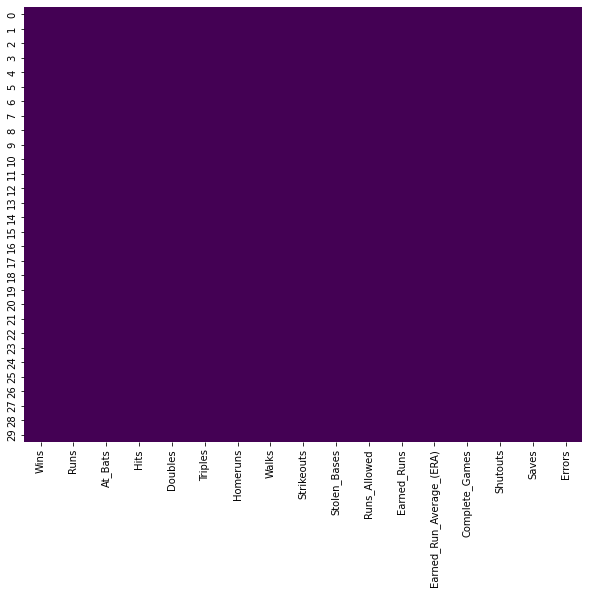

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(data.isnull(),cbar=False,cmap = 'viridis')

Observation:-

From the above heatmap it is clear that there is no missing values in the dataset.

In [13]:
#Checking the Uniqueness of Target.
data['Wins'].unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

The above unique values are present in the target column 'Wins'.

# Checking Duplicate values

In [14]:
# Checking duplicates
data.duplicated().sum()

0

Observation:
    
There is no duplicate rows are present in dataset.    

# Checking Skewness

In [15]:
# Checking skewness
data.skew()

Wins                        0.047089
Runs                        1.200786
At_Bats                     0.183437
Hits                        0.670254
Doubles                    -0.230650
Triples                     0.129502
Homeruns                    0.516441
Walks                       0.158498
Strikeouts                 -0.156065
Stolen_Bases                0.479893
Runs_Allowed                0.045734
Earned_Runs                 0.058710
Earned_Run_Average_(ERA)    0.053331
Complete_Games              0.736845
Shutouts                    0.565790
Saves                       0.657524
Errors                      0.890132
dtype: float64

The distribution is fairly symmetrical. 
Some of the features are not within the range(-0.5 to +0.5) like Runs Scored,Hits,Complete Game,Shut Outs,Saves and Errors.

# Checking Statistical Parameters

In [16]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Wins,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
Runs,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
At_Bats,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
Hits,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
Doubles,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
Triples,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
Homeruns,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
Walks,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
Strikeouts,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
Stolen_Bases,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


# Observations:

All of the features are numerical datatypes.

Target variable is 'Wins' and it is a int64 datatype. So it is a Regression problem.

In some of the columns mean is less than median(50%) Wins, So columns are slightly left skewed.

In few of the columns mean is more than median At Bat, Hits, Home Runs, Base on Balls, Complete Game, Saves and Errors. So all this features are slightly right skewed.

In two columns means is equal to median Triples and Stolen Base, No skewness present.

Some skewness and outliers are present as there is a big difference between 75% quantile.

From above observations we can conclude few outliers are present in dataset.

# Data Visualization

# Univariate Analysis

Using the graphs let us understand how each and other attributes are related and how are they contributing in predicting target variable

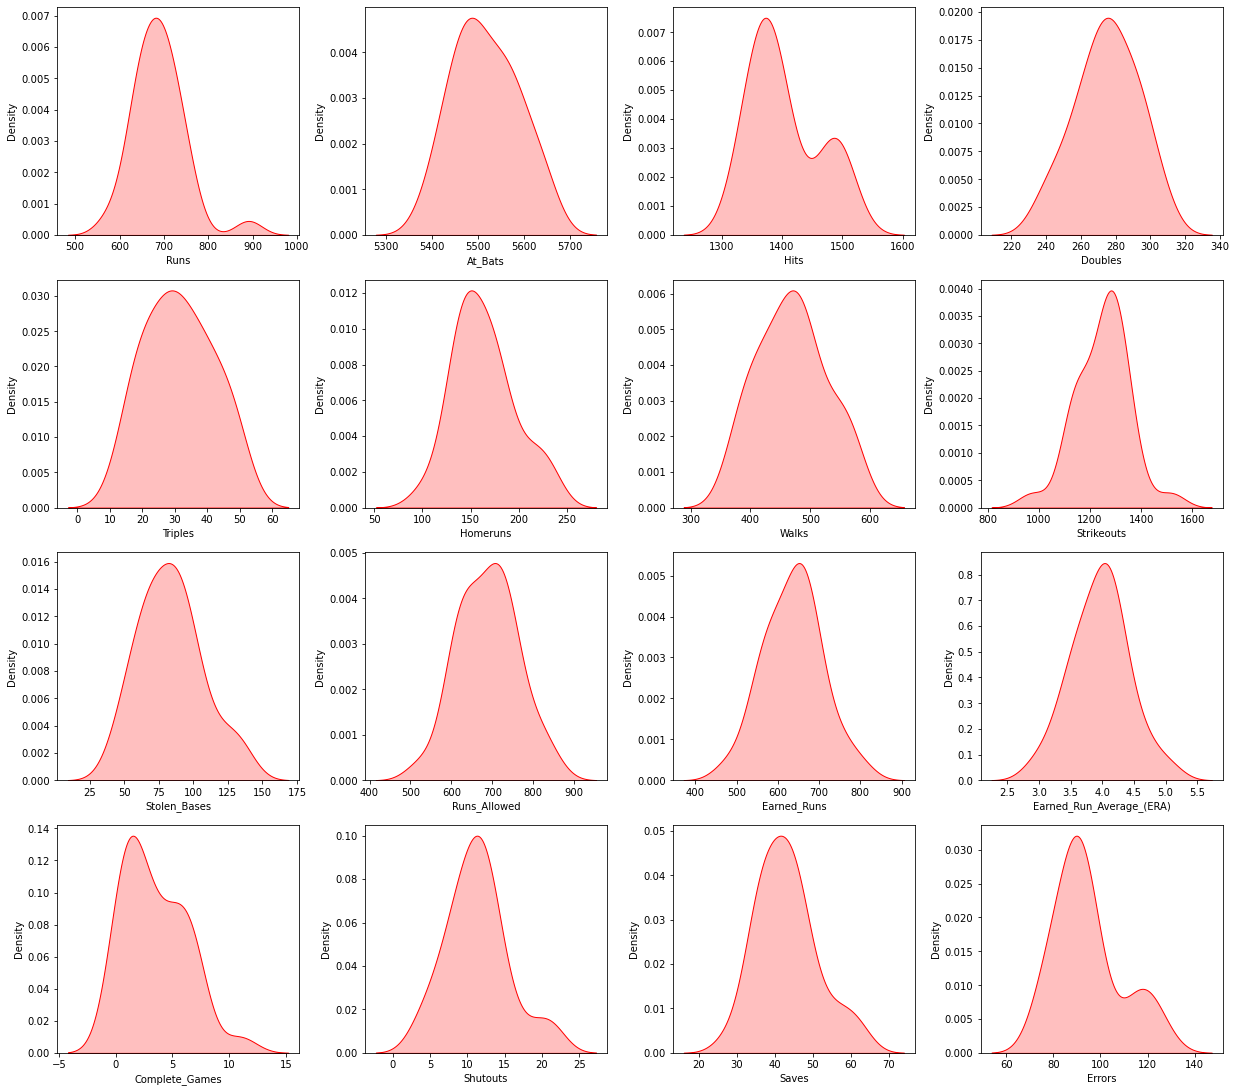

In [17]:
# Using Distribution Plot

fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(17,15))
index = 0
features = data.drop("Wins", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.distplot(value, ax=ax[index], hist=False, color="r", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()


We can see that mostly all columns data are normally distributed except for Runs Scored, Complete Game, Shut Outs and Errors columns that have slight skewness in them and will need to be treated accordingly.

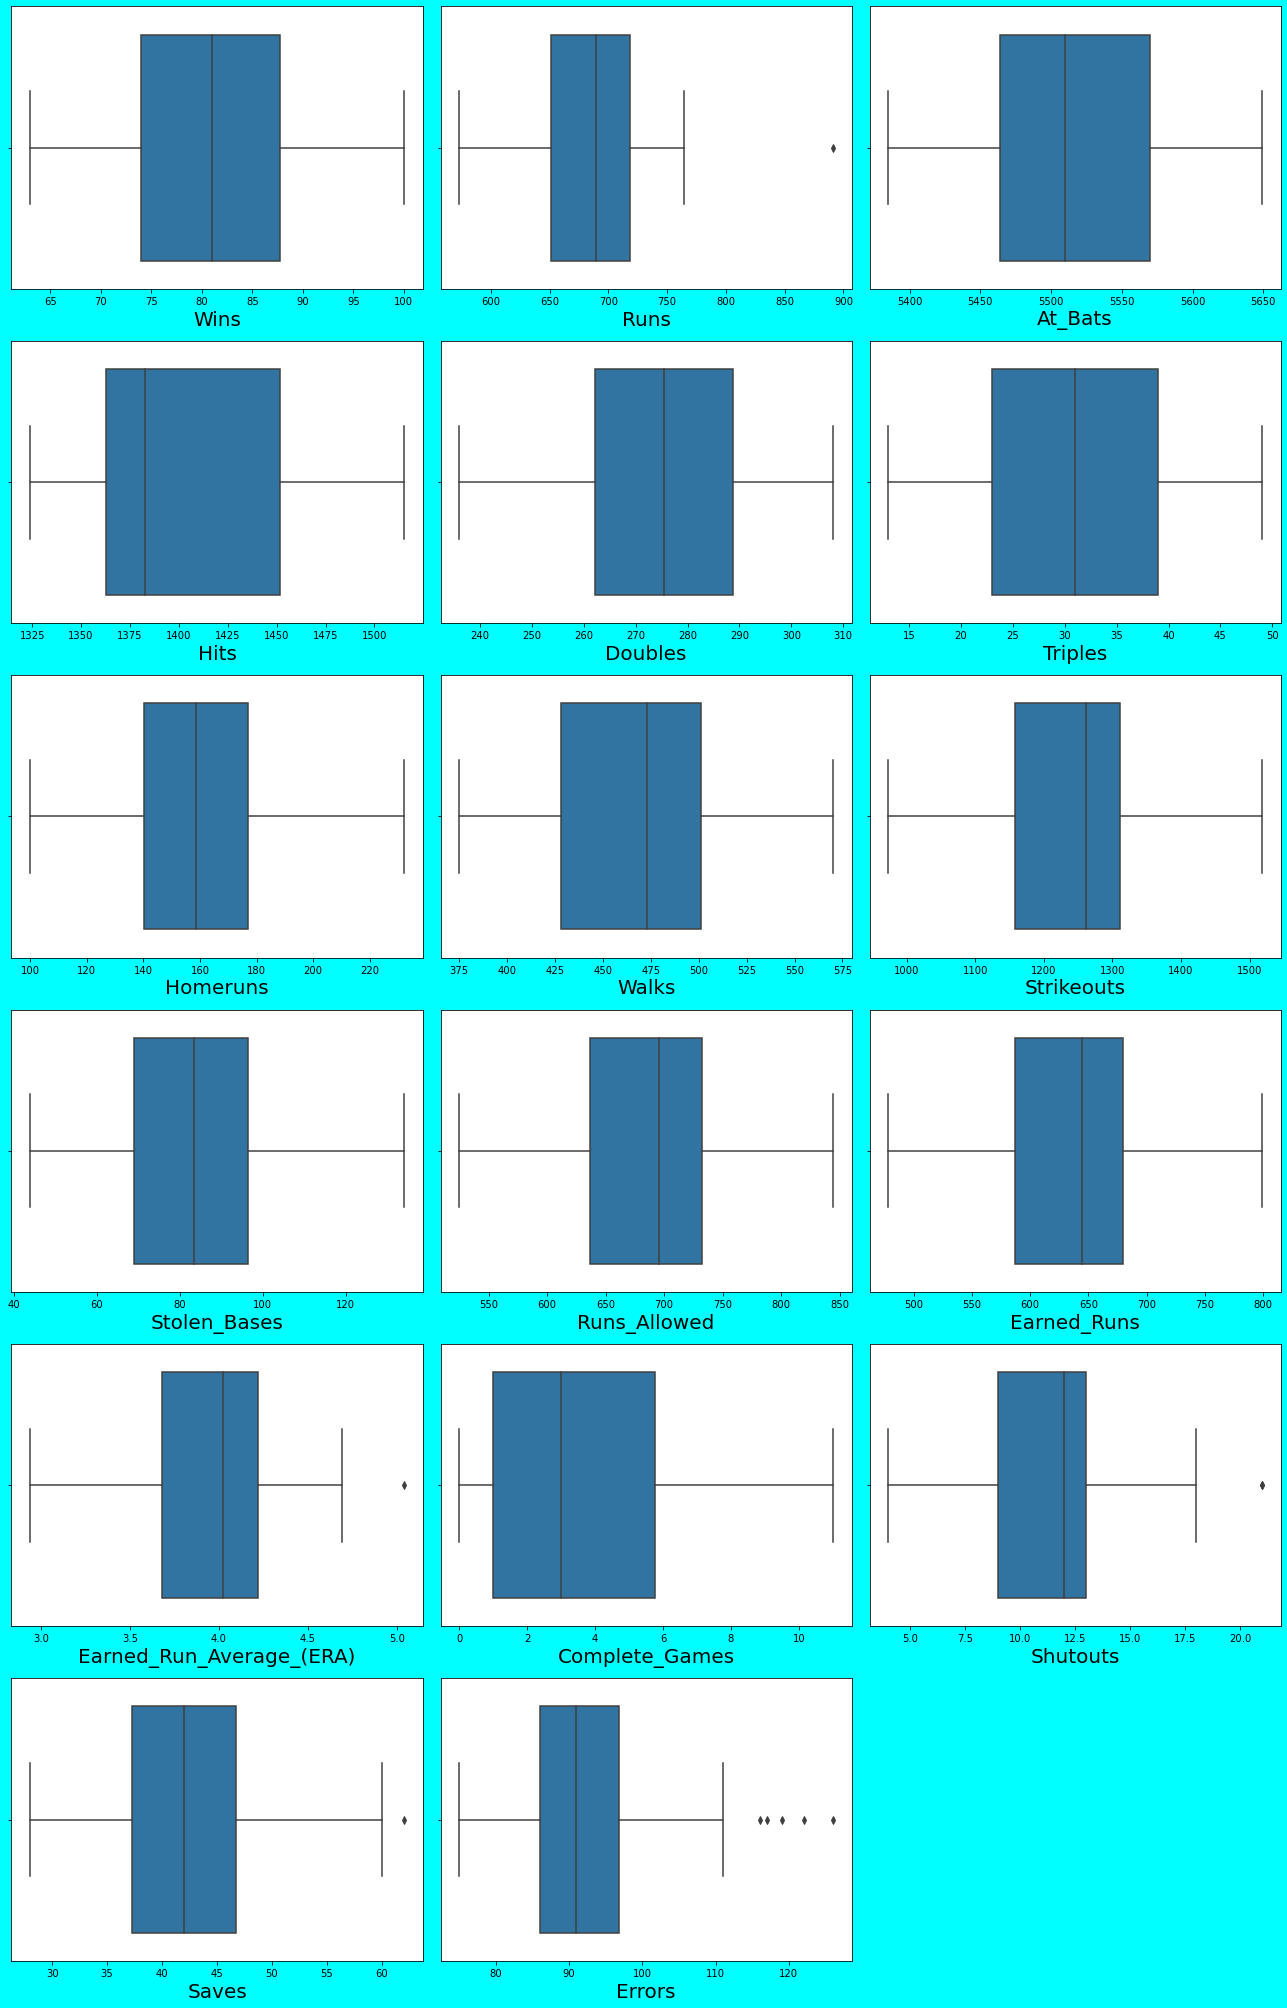

In [18]:
# Using Box Plot

plt.figure(figsize=(18,28),facecolor='cyan' )
plno=1
for x in data:
    if plno<=17:
        plt.subplot(6,3,plno)
        sns.boxplot(data[x])
        plt.xlabel (x, fontsize= 20)
    plno +=1
plt.tight_layout()

Observations:
   
 We can see that Columns Runs, Saves, Complete_Games and ERA, one outliers is presents.Errors column has some outliers.
    

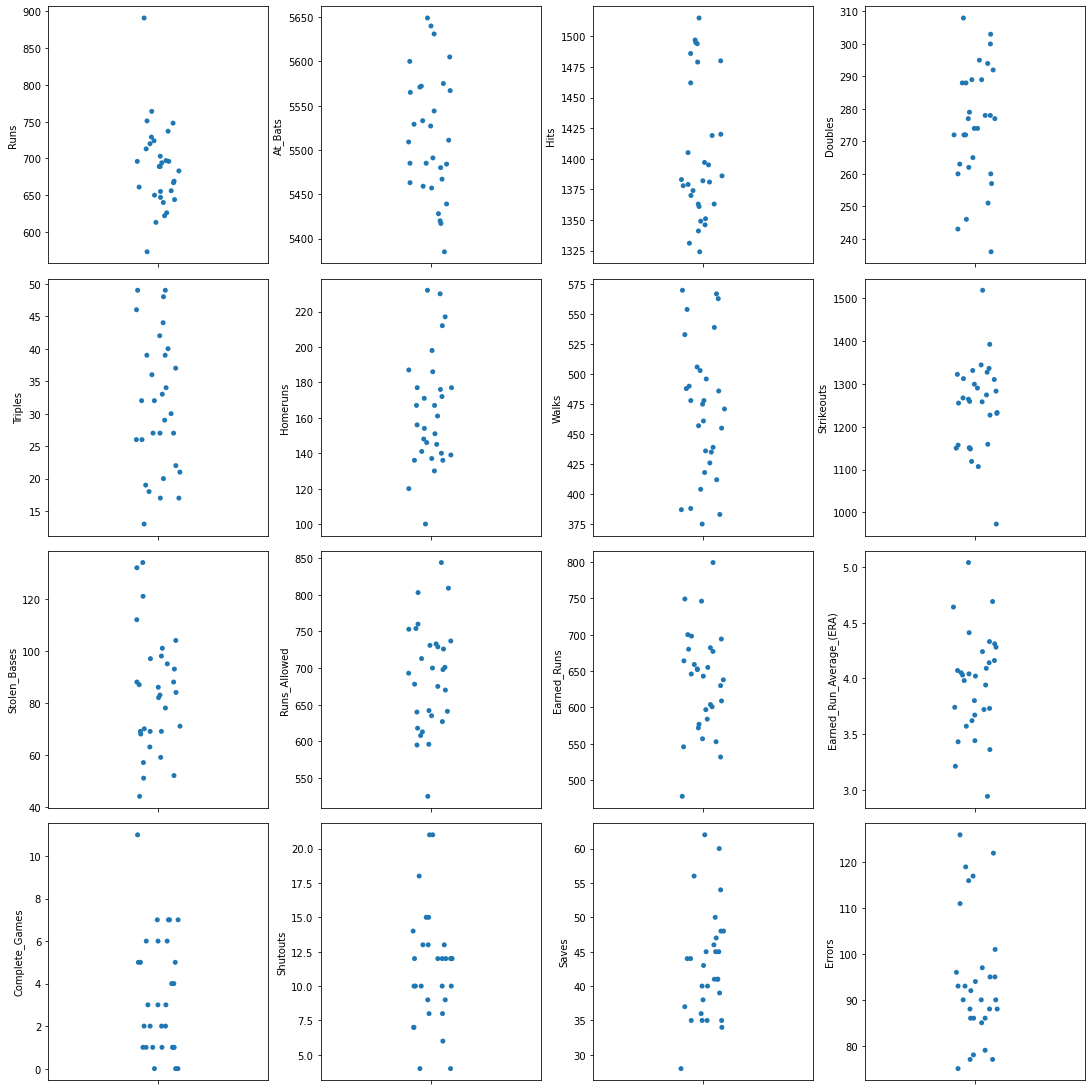

In [19]:
# Using strip plot

fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(15,15))
index = 0
features = data.drop("Wins", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.stripplot(y=col, data=data, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

Observations:
    
 With help of strip plot we are able to check data point distribution across the data set and it's range.

We can observe columns Runs Scored, Strike Outs, Shut Outs and Complete Game with single data points further away from the general accumulation indicating towards the presence of ouliers.

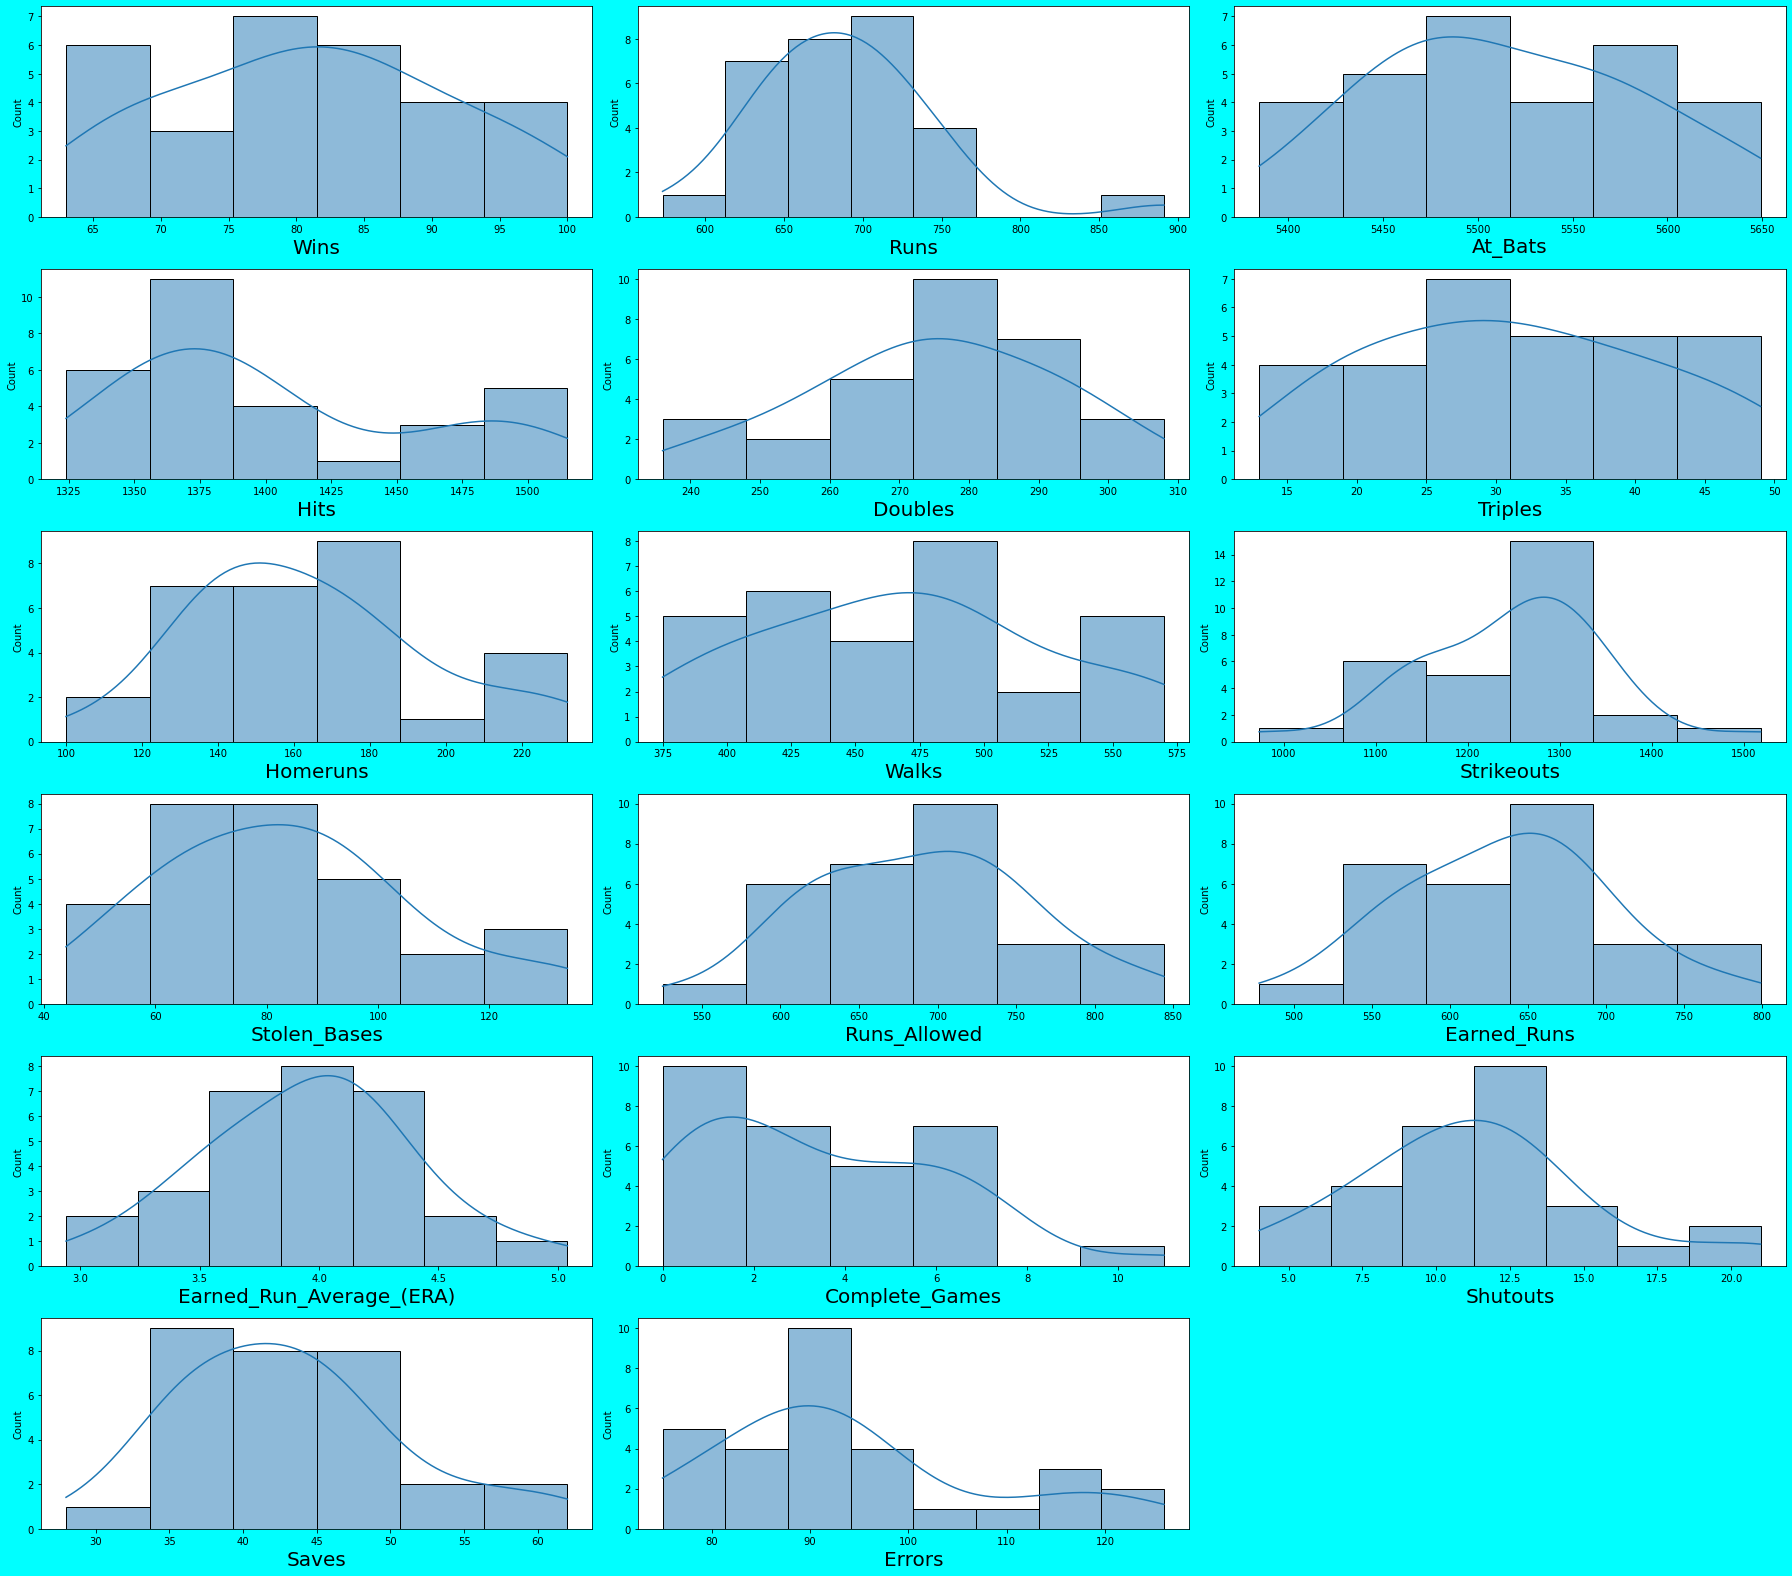

In [20]:
# Using hist plot 

plt.figure(figsize=(25,22),facecolor='cyan' )
plno=1
for x in data:
    if plno<=17:
        plt.subplot(6,3,plno)
        sns.histplot(data[x], kde=True)
        plt.xlabel (x, fontsize= 20)
    plno +=1
plt.tight_layout()

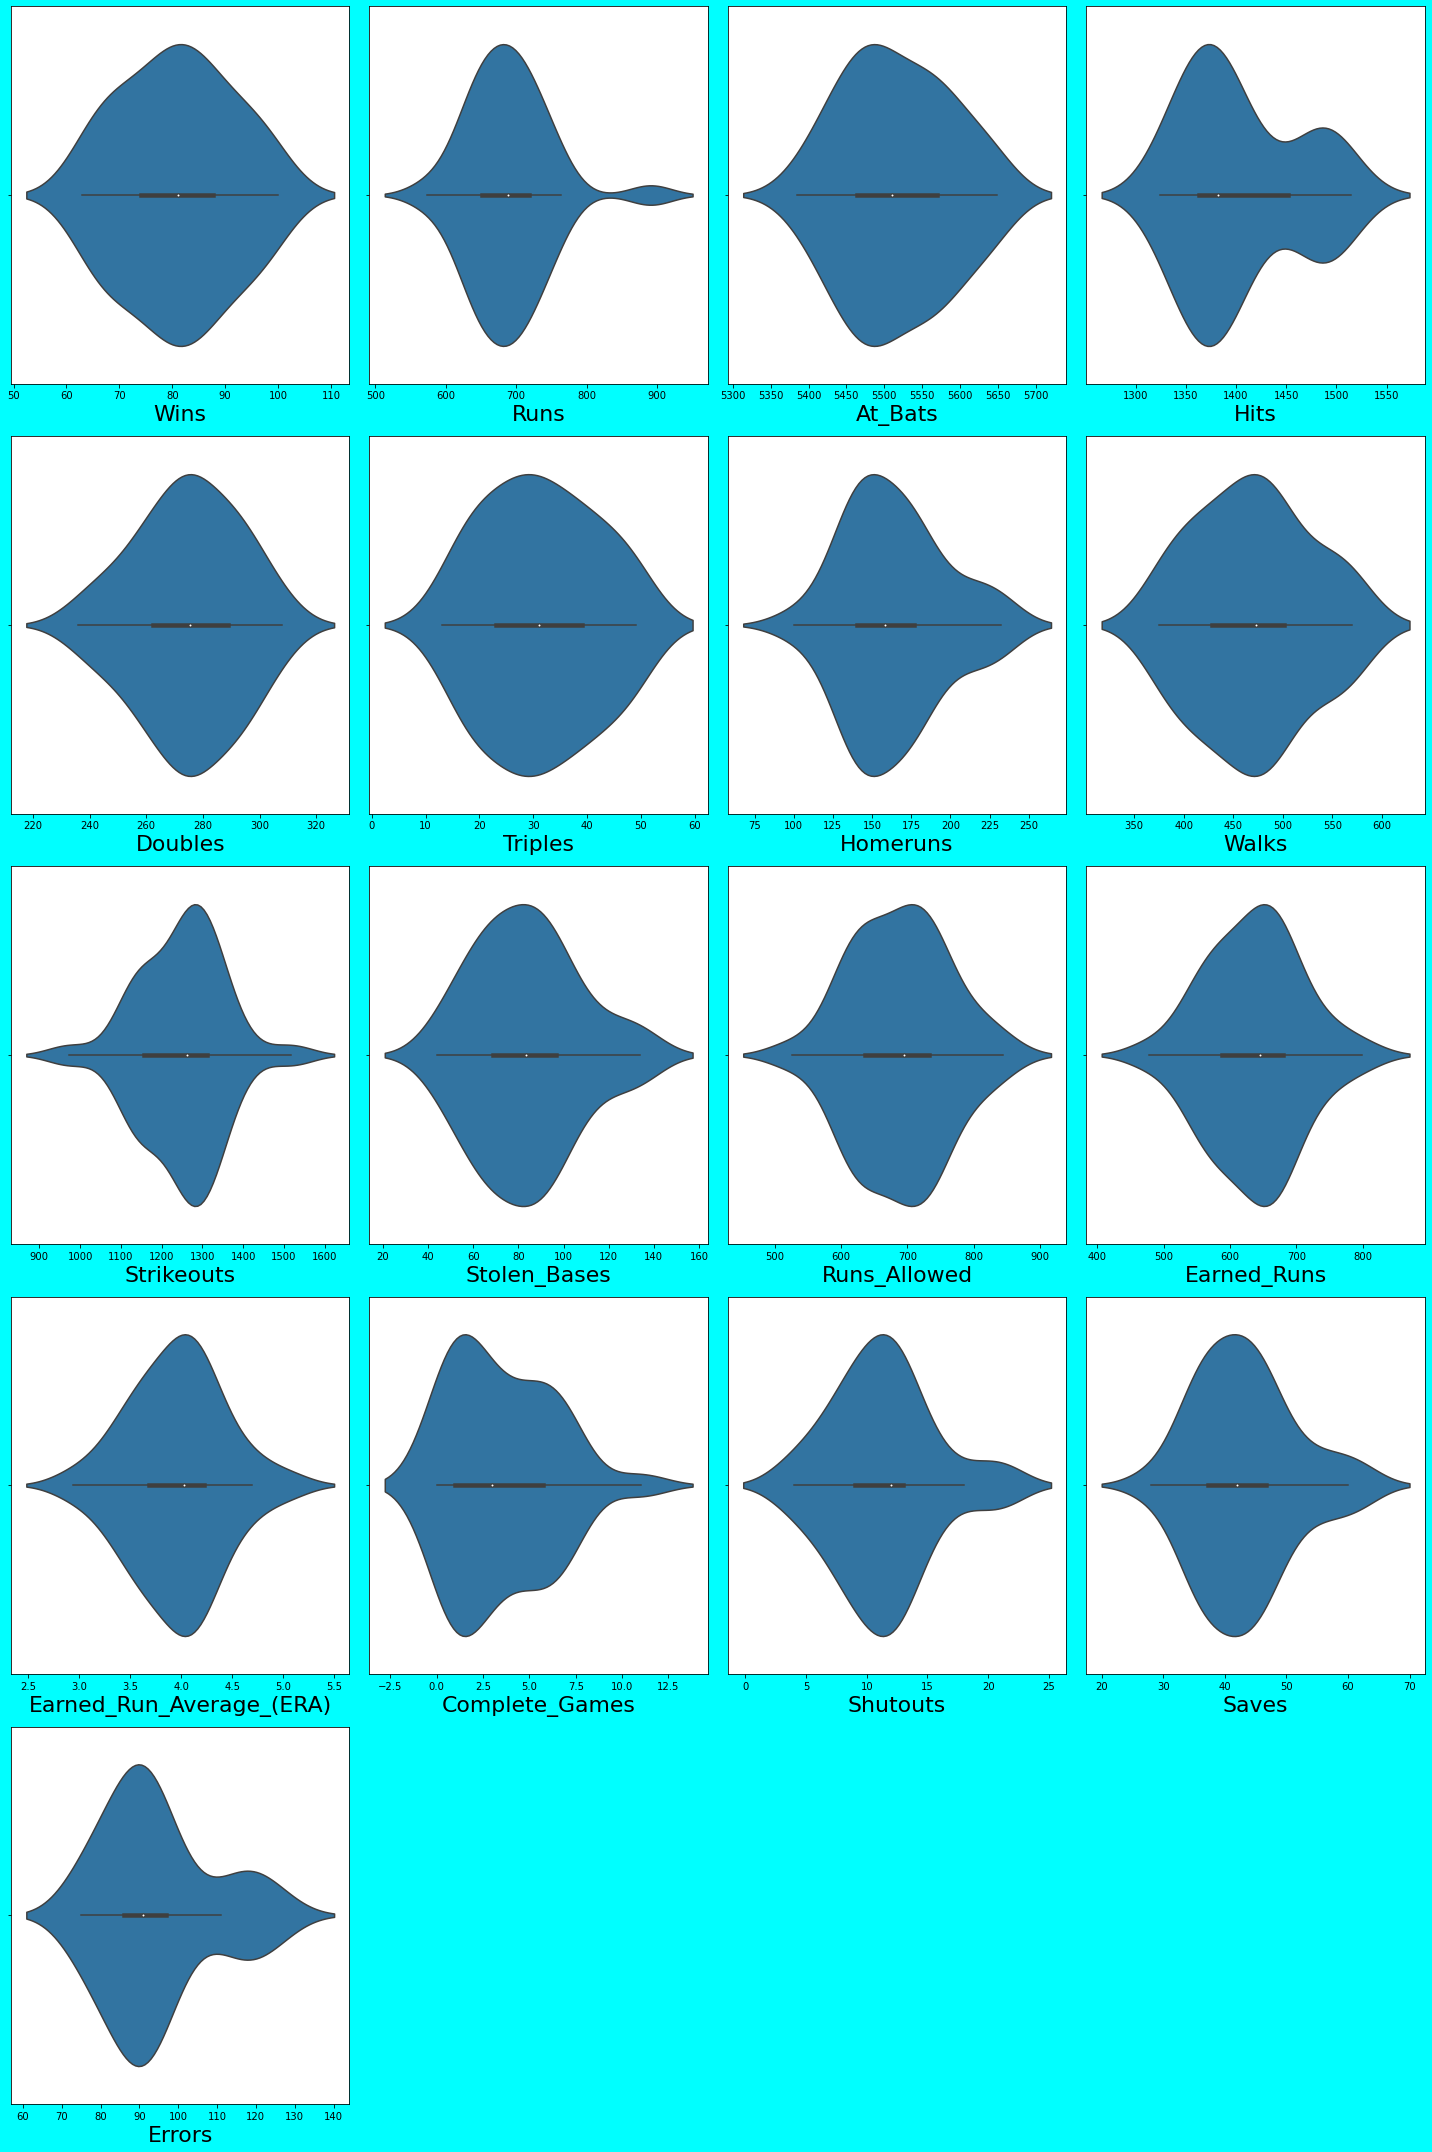

In [21]:
# using Violin plot

plt.figure(figsize=(20,30),facecolor='cyan' )
plno=1
for x in data:
    if plno<=17:
        plt.subplot(5,4,plno)
        sns.violinplot(data[x])
        plt.xlabel (x, fontsize= 22)
    plno +=1
plt.tight_layout()

Observations:
    
Also seems Shououts and Complete_Games are same in distribution.
Most of the Runs values are in between 600 to 800.
Most of the ERA values are in between 3 to 4.5.

# Checking relationship between target(WINS) with other features

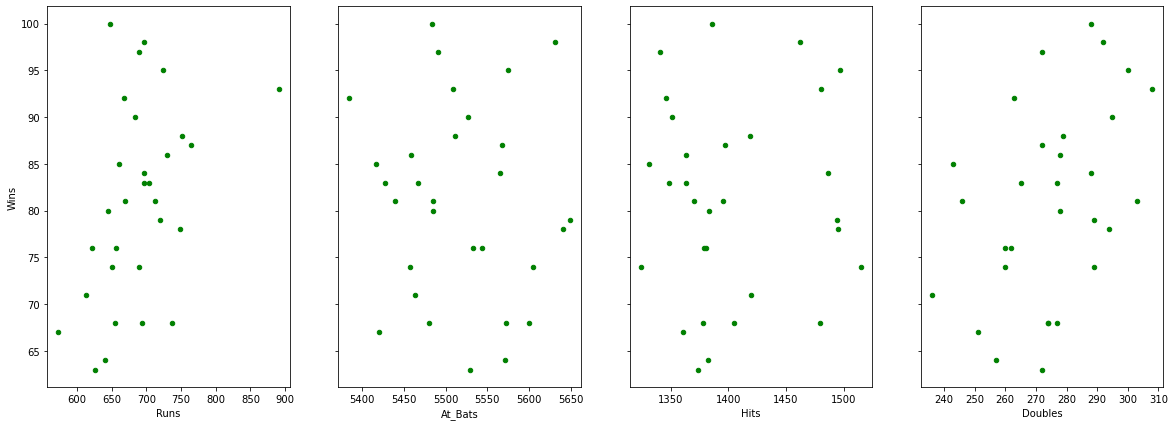

In [22]:
# Using Scatter plot
fig, axs =plt.subplots(1,4,sharey=True)
data.plot(kind='scatter', x='Runs', y='Wins', ax=axs[0], figsize=(20,7),color ='g')
data.plot(kind='scatter', x='At_Bats', y='Wins', ax=axs[1],color ='g')
data.plot(kind='scatter', x='Hits', y='Wins', ax=axs[2],color ='g')
data.plot(kind='scatter', x='Doubles', y='Wins', ax=axs[3],color ='g')
plt.show()

Observations:
    
Most of the Runs are in range 600-750.
No clear relationship is present between At_Bats, Hits and Doubles with Wins.

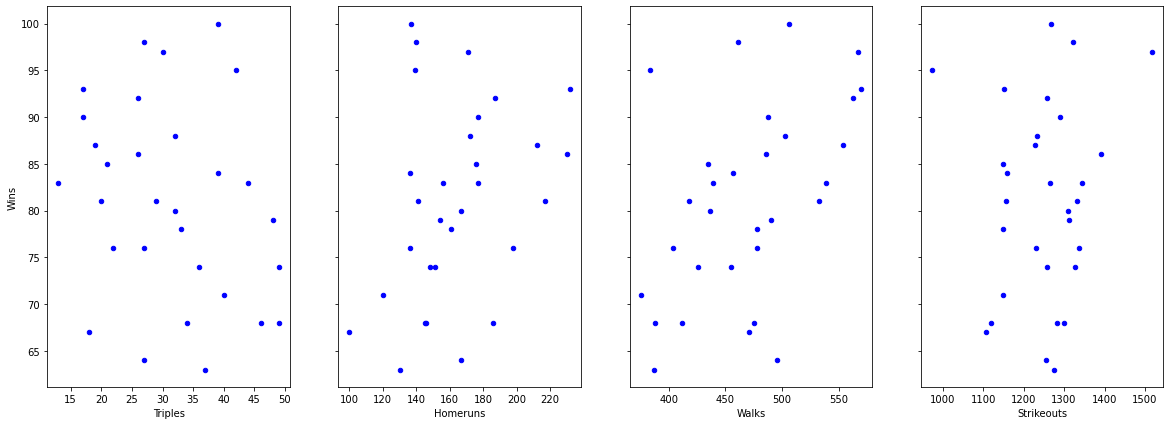

In [23]:
fig, axs =plt.subplots(1,4,sharey=True)
data.plot(kind='scatter', x='Triples', y='Wins', ax=axs[0], figsize=(20,7),color ='b')
data.plot(kind='scatter', x='Homeruns', y='Wins', ax=axs[1],color ='b')
data.plot(kind='scatter', x='Walks', y='Wins', ax=axs[2],color ='b')
data.plot(kind='scatter', x='Strikeouts', y='Wins', ax=axs[3],color ='b')
plt.show()

Observations:
    
Strikeouts are in range of 1100-1400
Wins is slightly increased with the increment of Homeruns and Walks
All the 4 graphs are very scattered with respect to pattern.

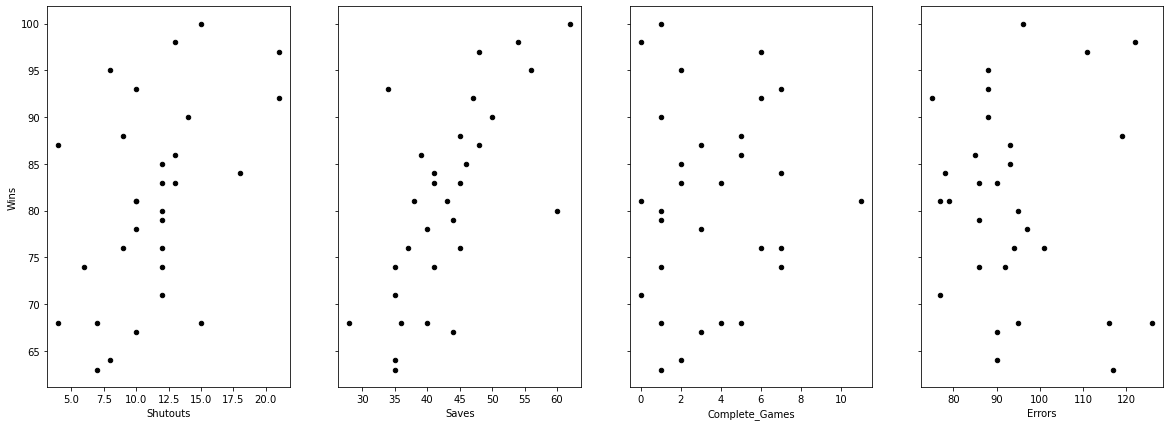

In [24]:
fig, axs =plt.subplots(1,4,sharey=True)
data.plot(kind='scatter', x='Shutouts', y='Wins', ax=axs[0], figsize=(20,7),color ='black')
data.plot(kind='scatter', x='Saves', y='Wins', ax=axs[1],color ='black')
data.plot(kind='scatter', x='Complete_Games', y='Wins', ax=axs[2],color ='black')
data.plot(kind='scatter', x='Errors', y='Wins', ax=axs[3],color ='black')
plt.show()

Observations:

Wins has no clear relation with Complete_Games and Errors.
Saves are directly related with wins.
Shutouts and Errors are very scattered with respect to pattern.

# Bi-Variate Analysis:

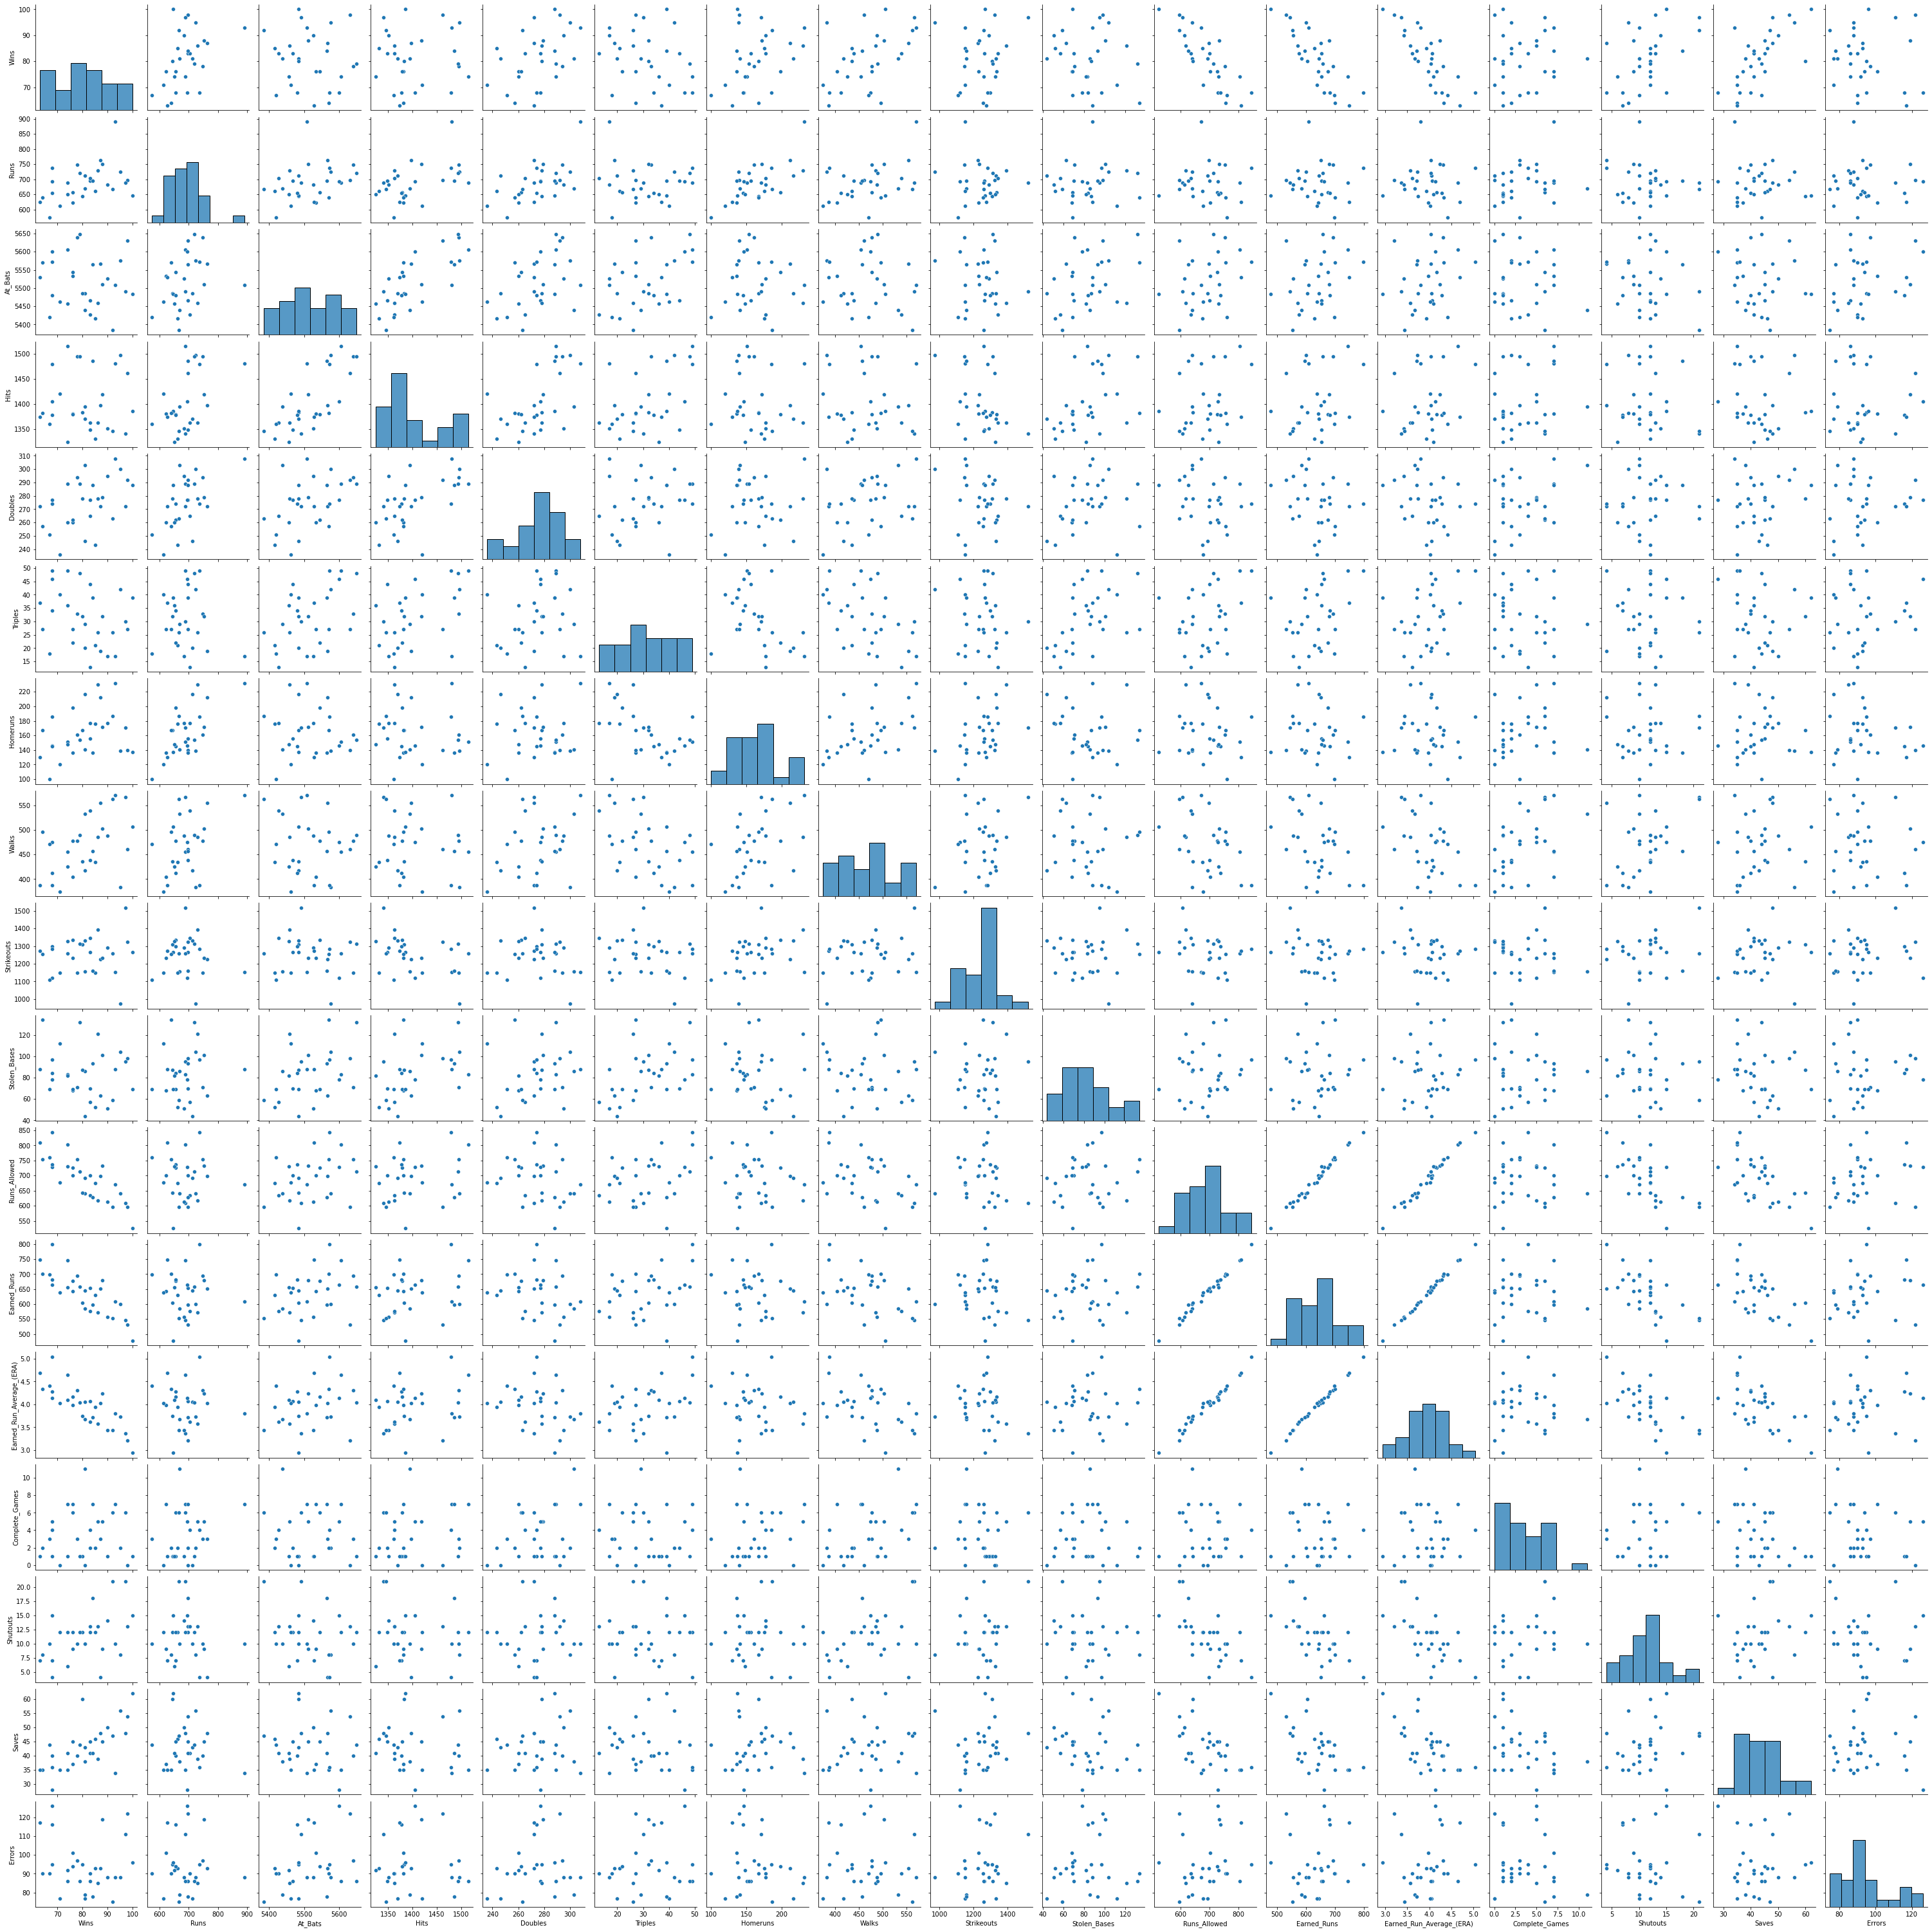

In [25]:
 # Using Pair plot
sns.pairplot(data)
plt.show()

Observations:

We can see 'Runs_Allowed', 'Earned_Runs' and 'Earned_Run_Average_(ERA)' are correlated together.
Seems some of the features have outliers.
Some features are in scattred.

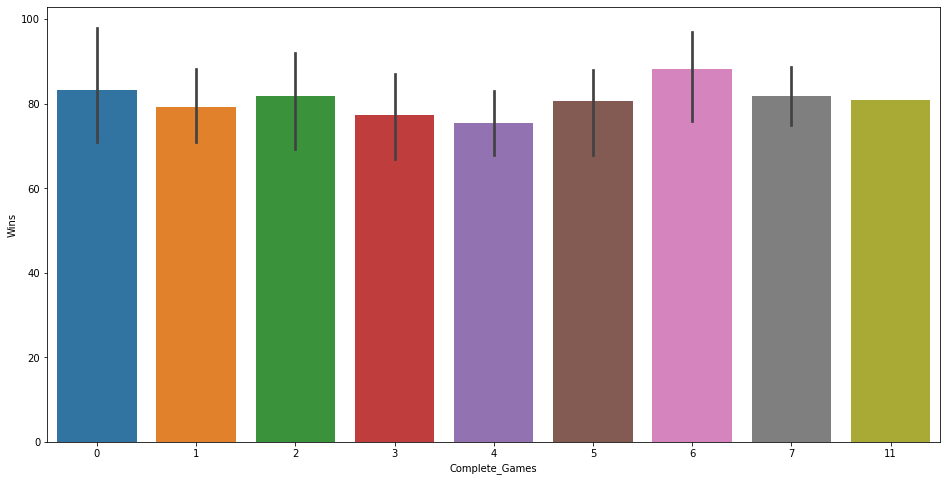

In [26]:
# Using Bar plot

# relation between Wins and Complete Game

plt.figure(figsize=(16,8))
sns.barplot(x="Complete_Games", y="Wins", data=data)
plt.show()

"Complete_Games" column and it's unique values do not show any pattern relating with our target  "Wins" column.
It should be in the range of 1-6 for best results.

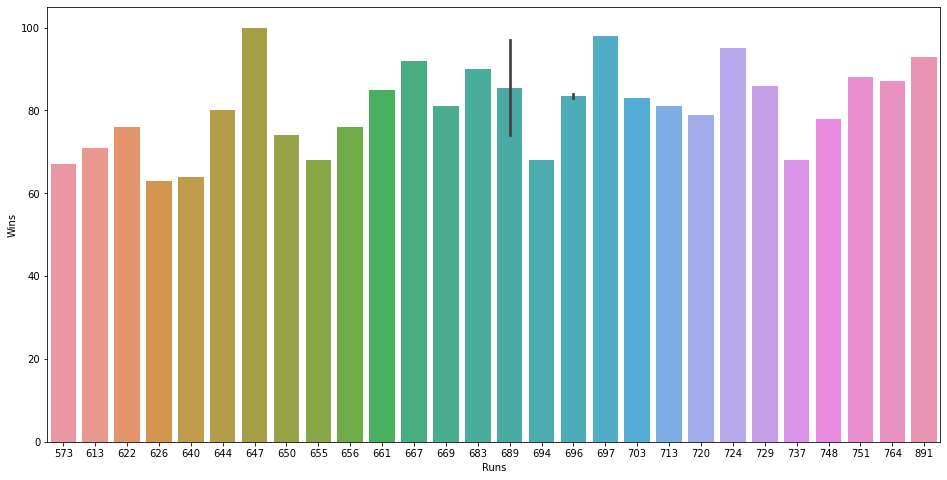

In [27]:

plt.figure(figsize=(16,8))
sns.barplot(x="Runs", y="Wins", data=data)
plt.show()

"Runs" column and it's unique values are distributed unevenlyin relation with our target "Wins" column.
Wining rate is very less for Runs <650.

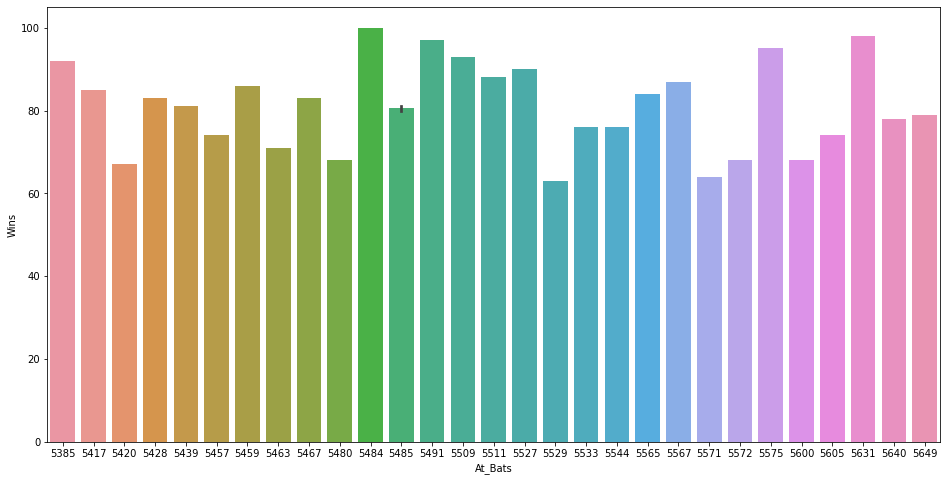

In [28]:
plt.figure(figsize=(16,8))
sns.barplot(x="At_Bats", y="Wins", data=data)
plt.show()

"At_Bat" column and it's unique values are also distributed unevenlyin relation with our target column "Wins"

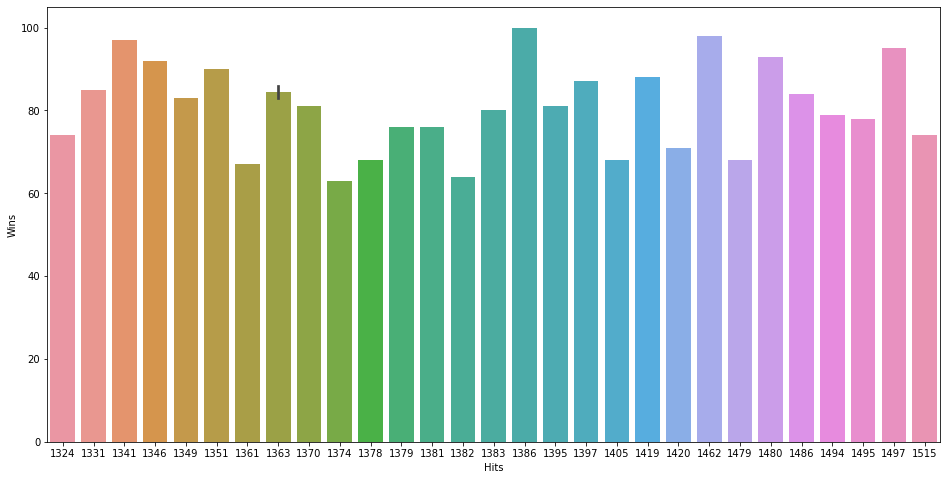

In [29]:
plt.figure(figsize=(16,8))
sns.barplot(x="Hits", y="Wins", data=data)
plt.show()

"Hits" column and it's unique values do not show any relation with our target "Wins" column.
When the Hits value is less than 1400, a good wining rate is present.Wining rate is very less for Hits <1325.


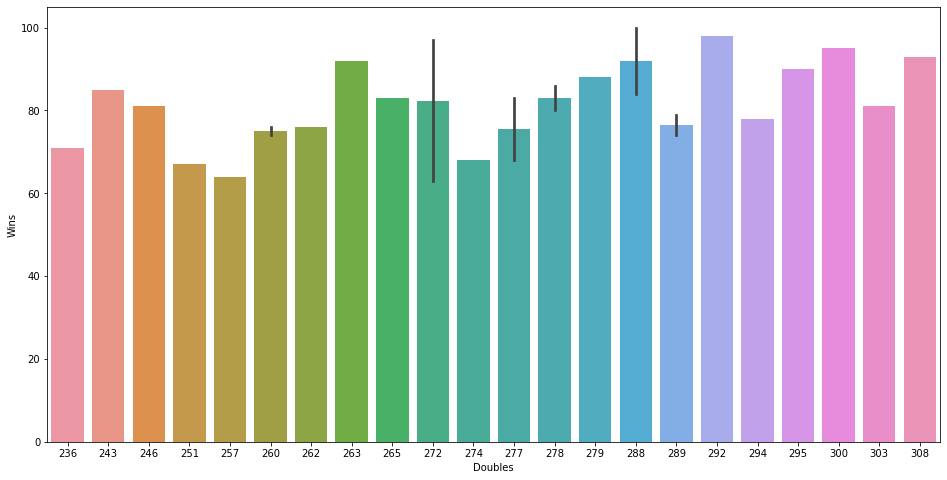

In [30]:
plt.figure(figsize=(16,8))
sns.barplot(x="Doubles", y="Wins", data=data)
plt.show()

"Doubles" column and it's unique values again do not show any definite pattern in relation with our target "Wins" column.
If Doubles increases, wining is also increase.Range of Doubles is 260 - 300.

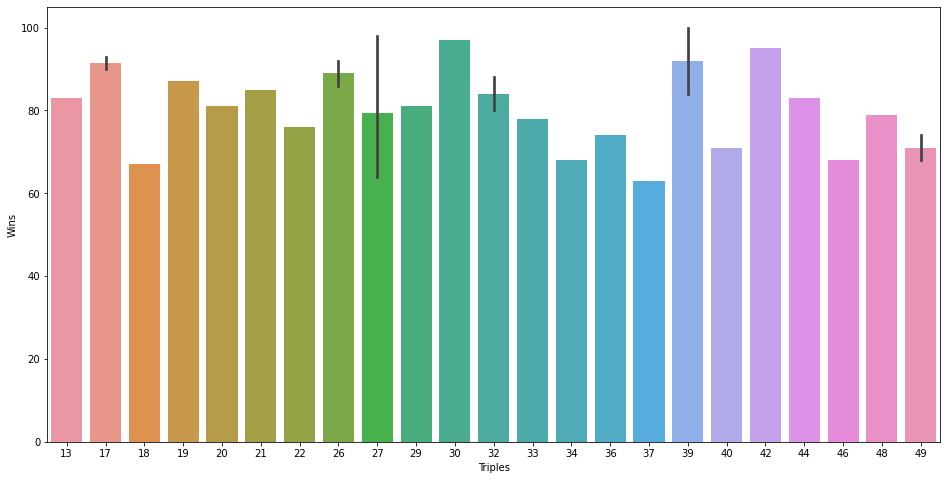

In [31]:
plt.figure(figsize=(16,8))
sns.barplot(x="Triples", y="Wins", data=data)
plt.show()

"Triples" column and it's unique values are distributed unevenly in relation with our target "Wins" column.
The range of Triples is 20-40.

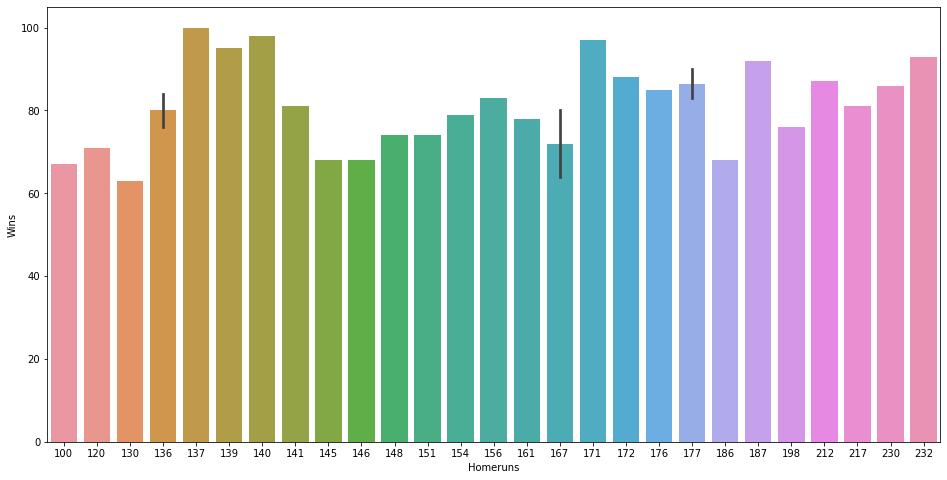

In [32]:
plt.figure(figsize=(16,8))
sns.barplot(x="Homeruns", y="Wins", data=data)
plt.show()

"Homeruns" column doesnot show any pattern in relation with our target "Wins" column.
If Homeruns increases, the wining possibility is also increases.
Range 130 to 180 for Homeruns.

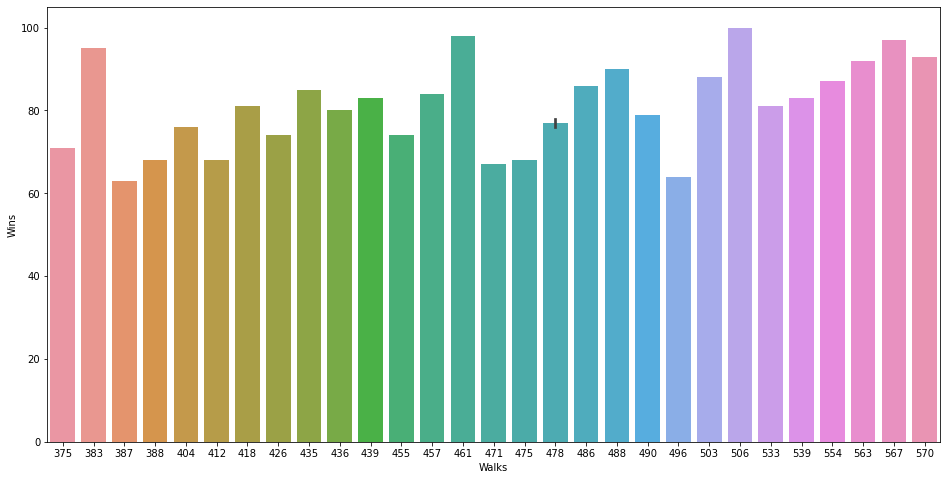

In [33]:
plt.figure(figsize=(16,8))
sns.barplot(x="Walks", y="Wins", data=data)
plt.show()

"Walks" column doesnot show any pattern in relation with our target "Wins" column.
Range of Walks in between 400 -500.

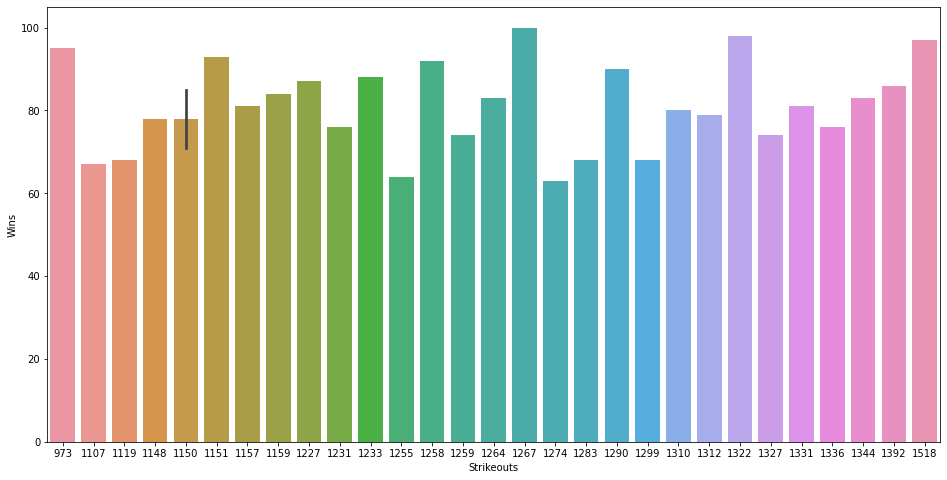

In [34]:
plt.figure(figsize=(16,8))
sns.barplot(x="Strikeouts", y="Wins", data=data)
plt.show()

"Strikeouts" column and it's unique values are distributed unevenly in relation with our target "Wins" column.

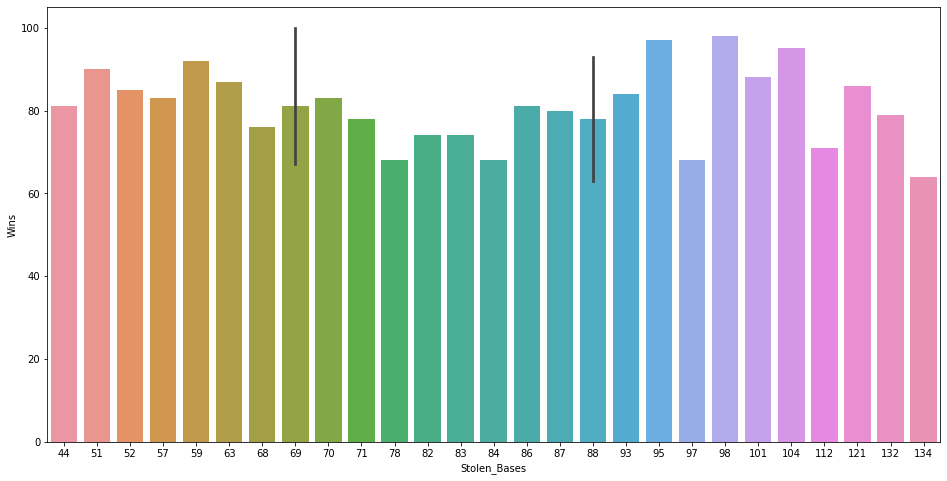

In [35]:
plt.figure(figsize=(16,8))
sns.barplot(x="Stolen_Bases", y="Wins", data=data)
plt.show()

"Stolen_Bases" column and it's unique values are distributed unevenly in relation with our target "Wins" column.

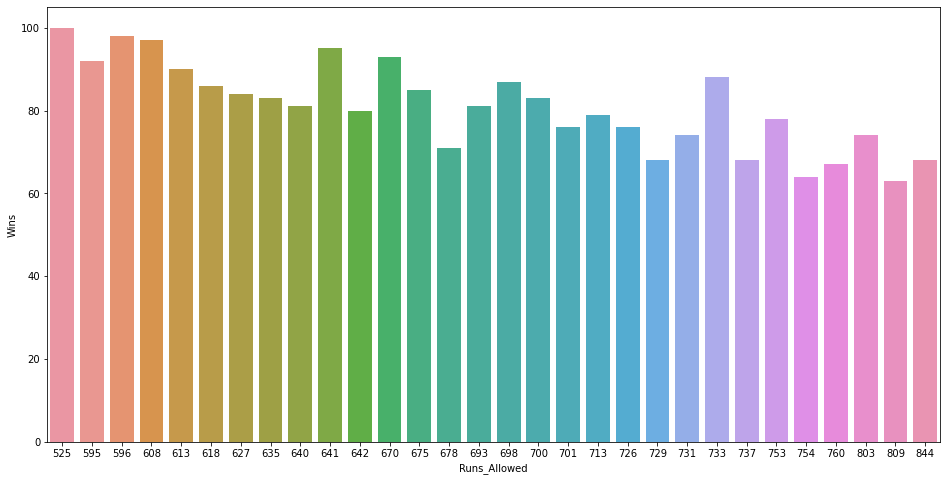

In [36]:
plt.figure(figsize=(16,8))
sns.barplot(x="Runs_Allowed", y="Wins", data=data)
plt.show()

"Runs_Allowed" column and it's unique values show a declining pattern with target "Wins" column.
Runs_Allowed is in the range 550 to 700.

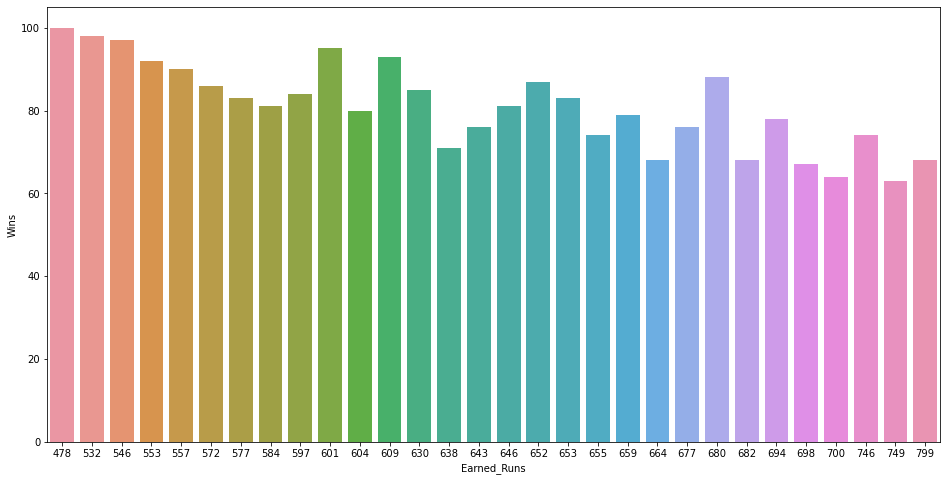

In [37]:
plt.figure(figsize=(16,8))
sns.barplot(x="Earned_Runs", y="Wins", data=data)
plt.show()

"Earned_Runs" column and it's unique values show a declining pattern with target "Wins" column.

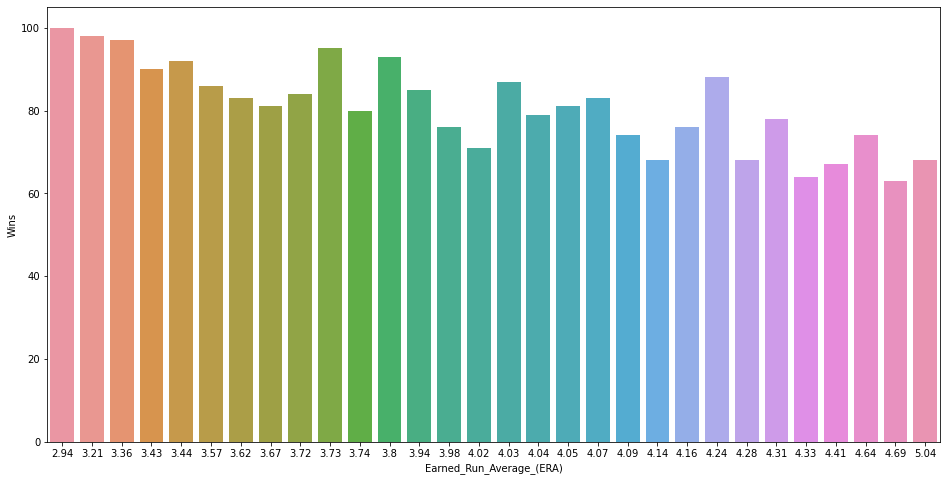

In [38]:
plt.figure(figsize=(16,8))
sns.barplot(x="Earned_Run_Average_(ERA)", y="Wins", data=data)
plt.show()

"Earned_Run_Average_(ERA)" column and it's unique values are distributed in a slight decreasing order with our target "Wins" column.
ERA range is in between 3.0 to 4.0 for good wining rate.


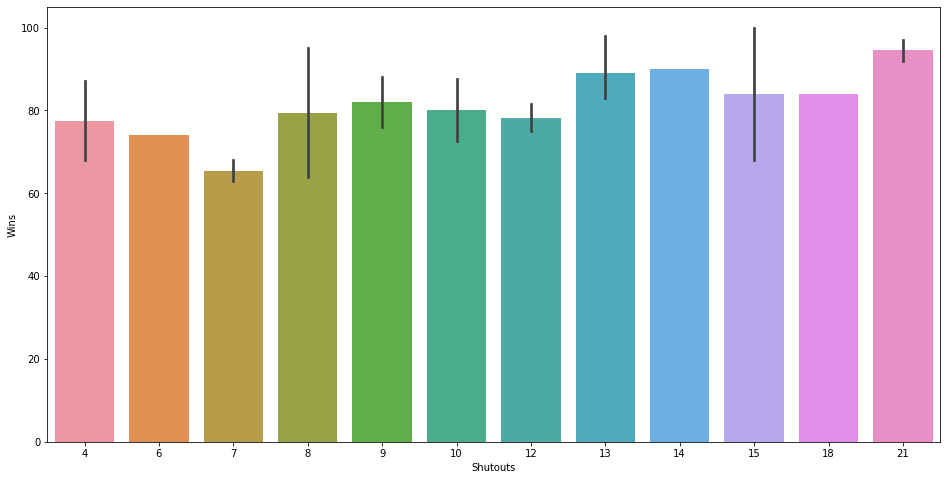

In [39]:
plt.figure(figsize=(16,8))
sns.barplot(x="Shutouts", y="Wins", data=data)
plt.show()

"Shutouts" column and it's unique values are distributed unevenly in relation with our target "Wins" column.
Range of shutouts is 7.5-15.

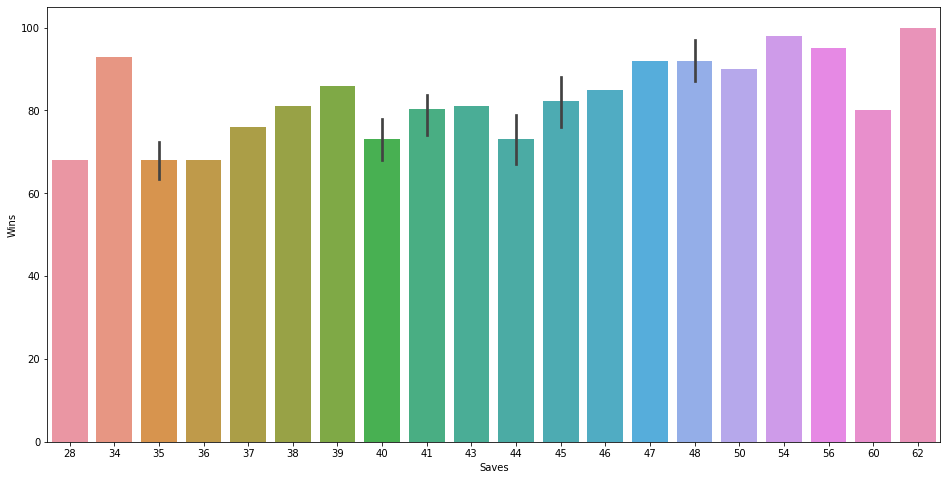

In [40]:
plt.figure(figsize=(16,8))
sns.barplot(x="Saves", y="Wins", data=data)
plt.show()

"Saves" column and it's unique values show a slightly increasing pattern in relation with target "Wins" column.
 Range of saves is 35-55.

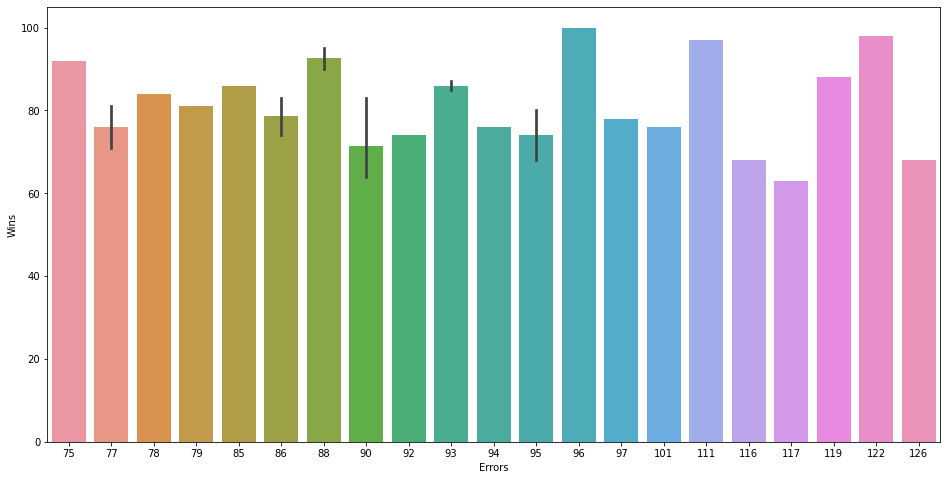

In [41]:
plt.figure(figsize=(16,8))
sns.barplot(x="Errors", y="Wins", data=data)
plt.show()

"Errors" column and it's unique values are distributed unevenly in relation with our target "Wins" column.
Errors in the of range 80-100.

# Correlations:

In [42]:
d= data.corr()['Wins'].drop(['Wins'])
d

Runs                        0.430751
At_Bats                    -0.087947
Hits                        0.037612
Doubles                     0.427797
Triples                    -0.251118
Homeruns                    0.307407
Walks                       0.484342
Strikeouts                  0.111850
Stolen_Bases               -0.157234
Runs_Allowed               -0.812952
Earned_Runs                -0.809435
Earned_Run_Average_(ERA)   -0.819600
Complete_Games              0.080533
Shutouts                    0.471805
Saves                       0.666530
Errors                     -0.089485
Name: Wins, dtype: float64

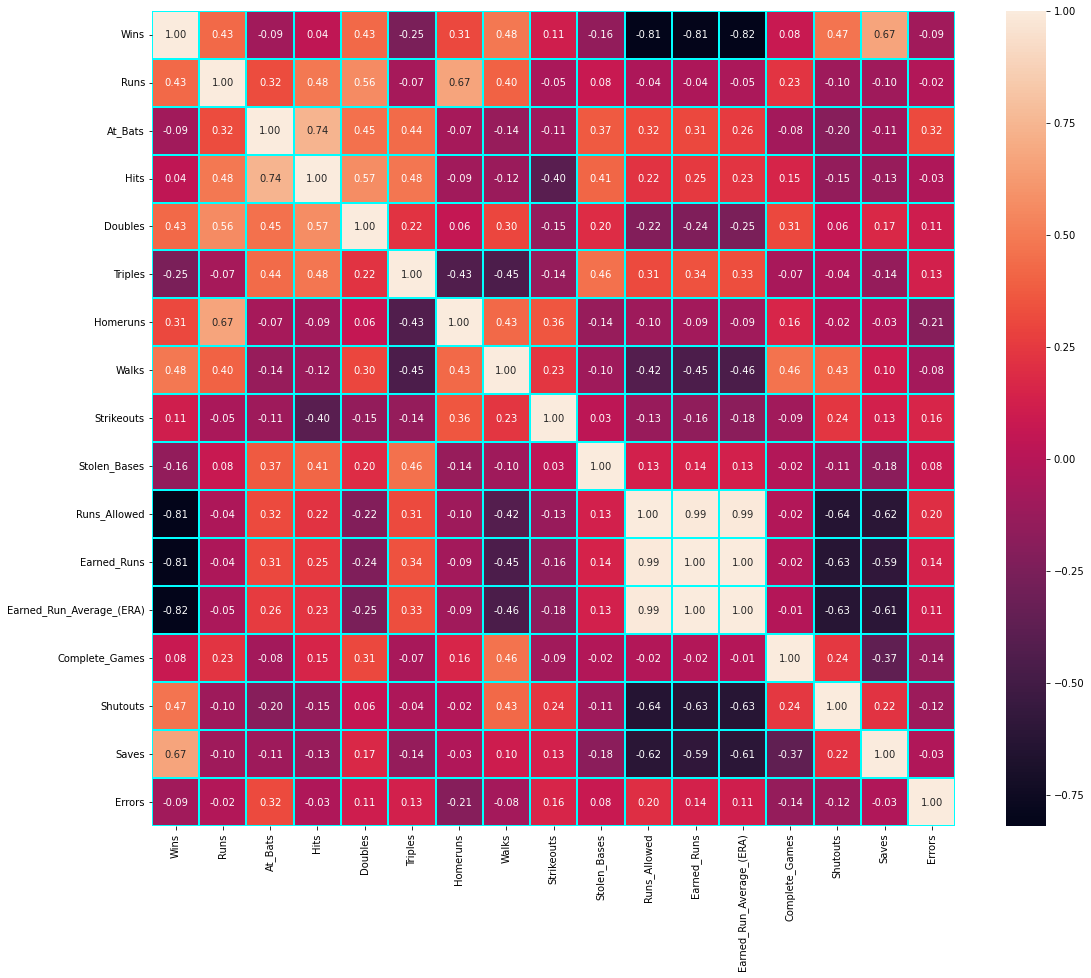

In [43]:
# Using Heat Map

plt.subplots(figsize=(18,15))
sns.heatmap(data.corr(), annot= True, linecolor= "cyan",  linewidths= 0.2, fmt='0.2f' )
plt.show()

Observations:
A +1(Light Shade) indicates a perfect positive correlation, meaning that both variables move in the same direction.

A –1(Dark Shade) indicates a perfect negative correlation, meaning that as one variable goes di different directions.
    
We can see in the above heatmap we see that our label "Wins" column is showing negatively correlated with feature columns "Runs_Average", "Earned_Runs" and "Earned _Run _Average".

Also there is visible multi colinearity between the feature columns "Earned_Runs", "Earned_Run_Average" and "Runs_Average" data points.

Hits, At_bats and errors have very less correlation with Wins.

# Handling Outliers

Using Z Score for removal of Outliers

In the previous Boxplot we have seen that there is some outiers in Errors columns.Now removing it.

In [44]:
z = np.abs(zscore(data))
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [45]:
new_data = data[(z<3).all(axis = 1)]
new_data.head()

,Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average_(ERA),Complete_Games,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [46]:
new_data.shape

(29, 17)

Data Loss

Before rows were 30,Now there are 29 rows,it is minimal loss which is acceptable.

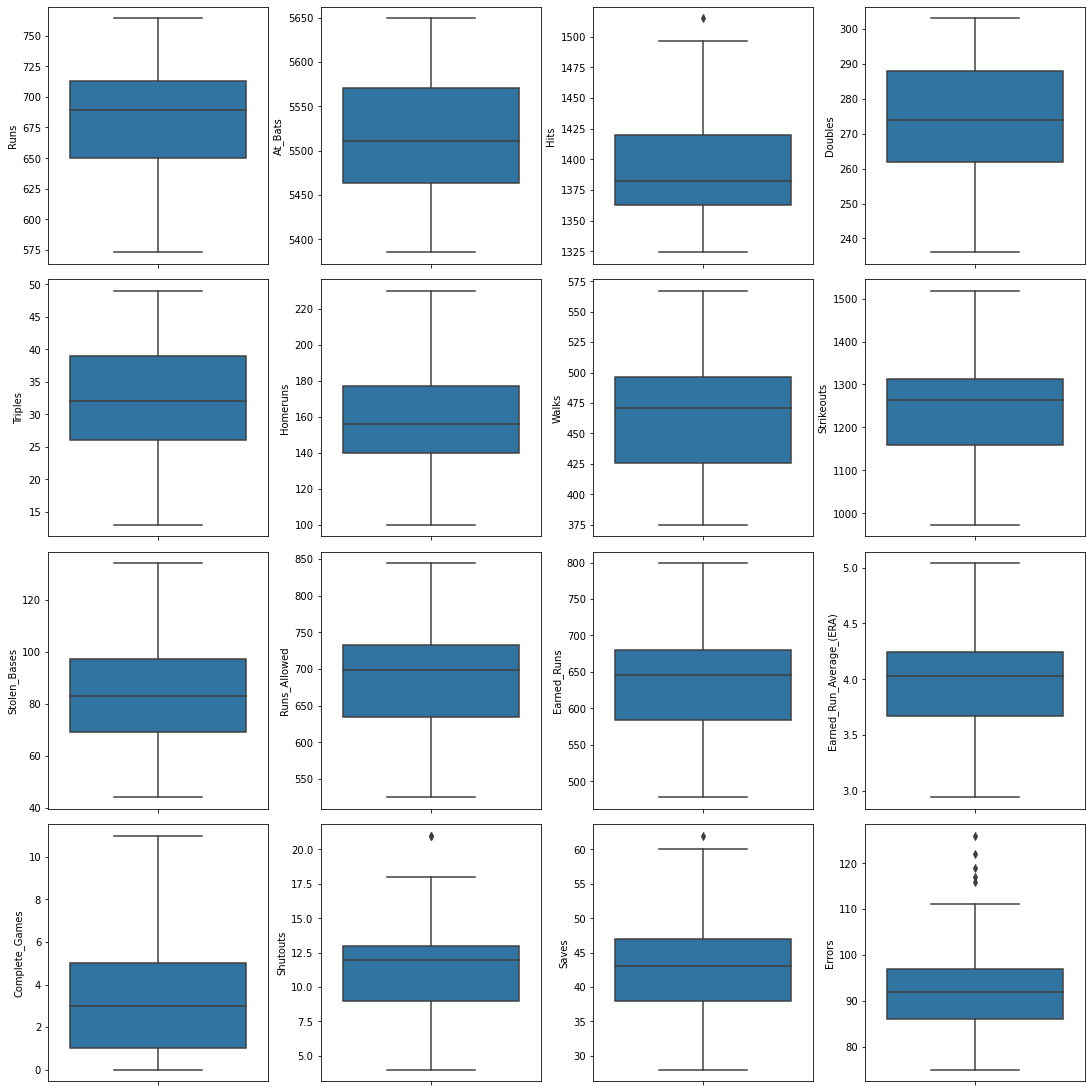

In [47]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(15,15))
index = 0
features = new_data.drop("Wins", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.boxplot(y=col, data=new_data, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

# Observations:

Still outiers are present in Errors columns. But after removing outliers by Z score method it is seen that still there is some outliers in errors column. As the dataset is not big (30 rows),removal of rows can hamper result ,so keeping the remaining part as the deletation made the loss of data.

# Checking Skewness

In [48]:
new_data.skew()

Wins                        0.119013
Runs                       -0.215364
At_Bats                     0.169573
Hits                        0.783772
Doubles                    -0.335304
Triples                     0.090124
Homeruns                    0.450862
Walks                       0.151193
Strikeouts                 -0.233815
Stolen_Bases                0.494966
Runs_Allowed                0.018155
Earned_Runs                 0.018461
Earned_Run_Average_(ERA)    0.016693
Complete_Games              0.854980
Shutouts                    0.526943
Saves                       0.627480
Errors                      0.840271
dtype: float64

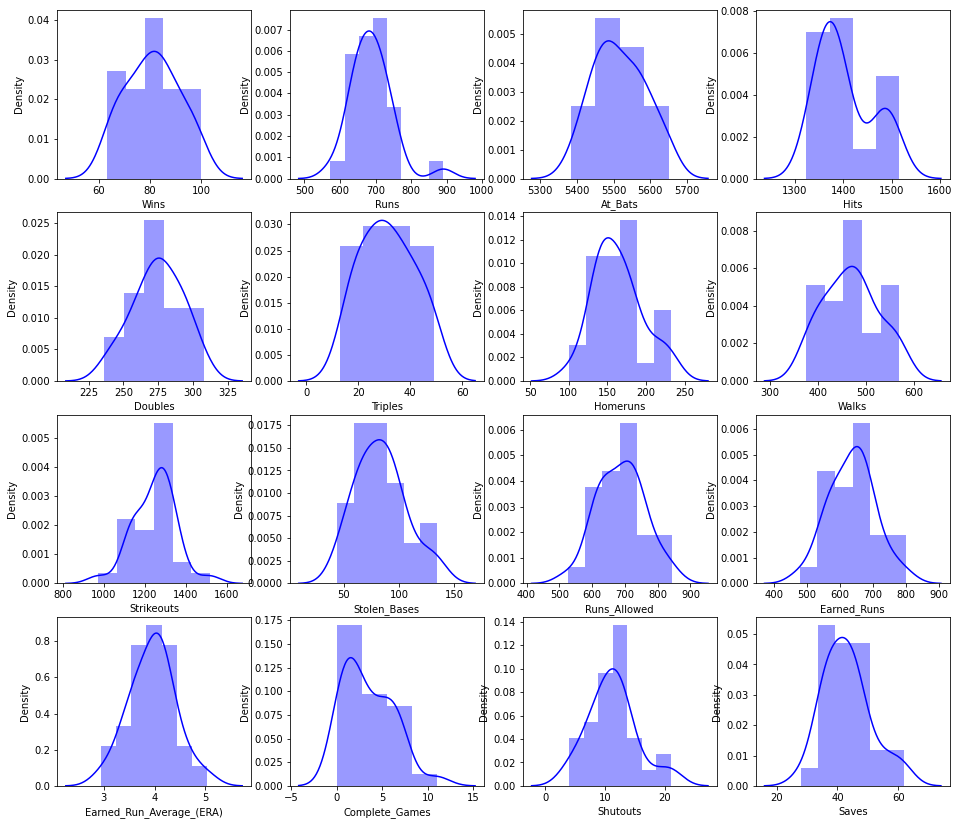

In [49]:
pltnum=1 
plt.figure(figsize=(16,18))
for col in new_data:
    if pltnum<17:
        ax=plt.subplot(5,4,pltnum)
        sns.distplot(data[col],color='blue')
        pltnum+=1
    
plt.show()

Observations:
    
 Columns Hits, Shutouts, Saves, Complete_Games snd Errors are positively skewed in nature.

In [50]:
# Using Boxcox

data2= new_data.copy()
data2.head()

,Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average_(ERA),Complete_Games,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [51]:
from sklearn.preprocessing import PowerTransformer
scaler= PowerTransformer(method= 'yeo-johnson')

features=['Hits', 'Shutouts', 'Saves', 'Complete_Games','Errors']
data2[features]= scaler.fit_transform(data2[features].values)
data2[features].head()

,Hits,Shutouts,Saves,Complete_Games,Errors
0,4.163336e-16,-0.787002,1.532753,-0.307098,-0.348265
1,-2.498002e-16,0.236737,0.312020,-0.307098,-0.540820
2,0.000000e+00,-0.252844,-0.664137,2.011315,-1.326125
3,-8.326673e-17,-0.513555,-0.820689,1.264463,0.650818
4,4.718448e-16,0.236737,-1.149165,1.264463,-0.540820


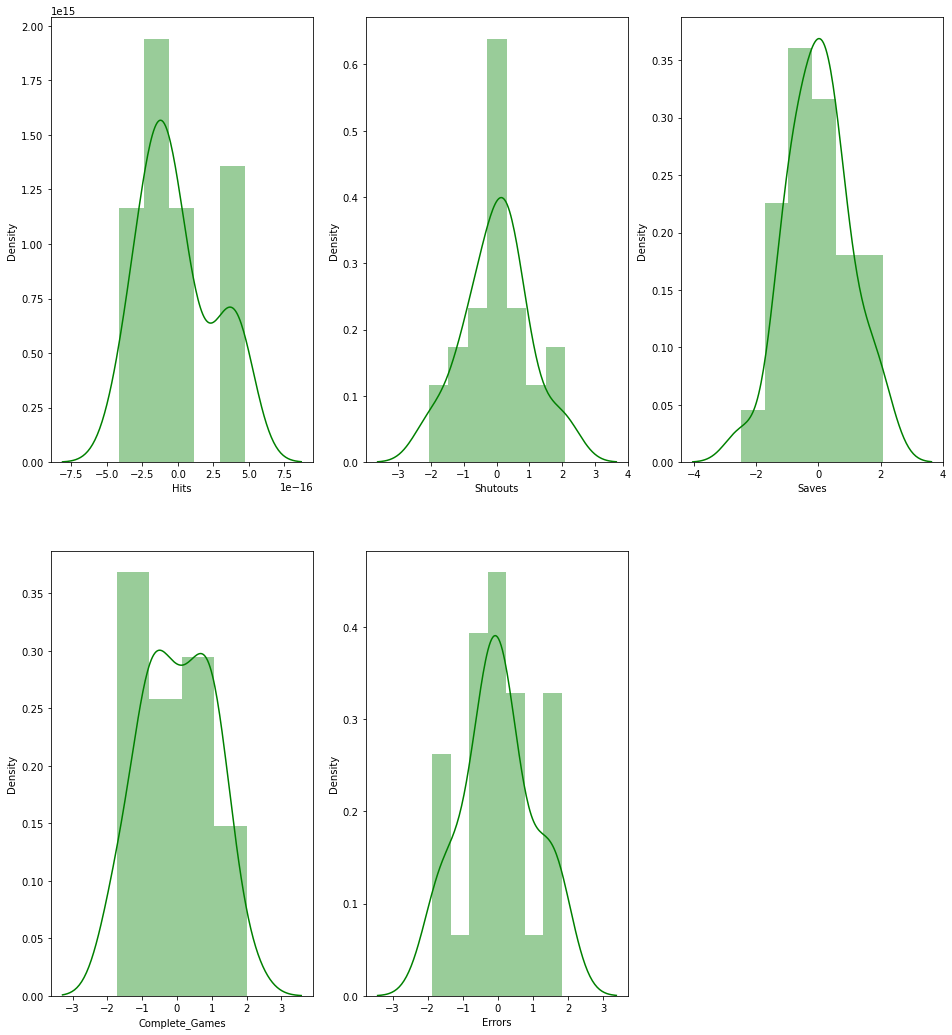

In [52]:
pltnum=1 
plt.figure(figsize=(16,18))
for x in data2[features]:
    if pltnum<6:
        ax=plt.subplot(2,3,pltnum)
        sns.distplot(data2[x],color='green')
        pltnum+=1
    
plt.show()

 Checking Skewness after transforming skewed features

In [53]:
data2.skew()

Wins                        0.119013
Runs                       -0.215364
At_Bats                     0.169573
Hits                        0.000000
Doubles                    -0.335304
Triples                     0.090124
Homeruns                    0.450862
Walks                       0.151193
Strikeouts                 -0.233815
Stolen_Bases                0.494966
Runs_Allowed                0.018155
Earned_Runs                 0.018461
Earned_Run_Average_(ERA)    0.016693
Complete_Games             -0.045947
Shutouts                    0.000529
Saves                      -0.000925
Errors                      0.065585
dtype: float64

Observations:

Now no skewness present in dataset.

# Checking Multicollinearity

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Using Variance Inflation Factor(VIF)
vif= pd.DataFrame()
vif["VIF"]= [variance_inflation_factor(data2,i)for i in range(data2.shape[1])]
vif["Features"] = data2.columns
vif


,VIF,Features
0,1110.344704,Wins
1,1942.635540,Runs
2,3727.698538,At_Bats
3,4.791417,Hits
4,1036.598788,Doubles
5,35.506943,Triples
6,204.331372,Homeruns
7,253.481295,Walks
8,416.468908,Strikeouts
9,25.770130,Stolen_Bases


Observations:
 There is high VIF values in Earned_Runs.Some features are correlated with   each other but less correlation with target variables.
 Runs_Allowed,Earned_Run_Average,Earned_Runs are highly correlated with       each other.

# Feature Scaling

In [55]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()



# Splitting the dataset into 'X' and 'Y' for feature and label

In [56]:
x=data2.drop(columns=['Wins'])
y=data2['Wins']


In [57]:
# Data standarization

x_scale= scaler.fit_transform(x)

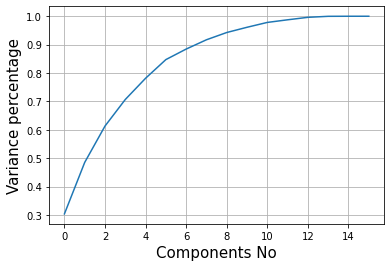

In [58]:
from sklearn.decomposition import PCA
pca = PCA()


x_pca = pca.fit_transform(x_scale)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Components No', fontsize= 15)
plt.ylabel('Variance percentage', fontsize= 15)
plt.grid()
plt.show()

Observations:
    
We can take principal component = 12 which covers maximum variance.

In [59]:
pca_new = PCA(n_components=10)
x_scale_new = pca_new.fit_transform(x_scale)
x_scale_final= pd.DataFrame(x_scale_new)
x_scale_final.head()

,0,1,2,3,4,5,6,7,8,9
0,1.039096,-2.920272,2.302903,-0.551265,-2.355800,-0.345139,0.839393,0.564025,0.729680,-0.460414
1,0.012086,0.452989,0.319340,-0.026112,-0.293653,0.391906,-0.913851,1.463218,0.020197,-0.190593
2,-1.185723,-0.860637,0.150767,2.765438,-0.625954,-0.610415,1.424475,0.911571,0.039729,1.205417
3,0.719000,1.422118,0.709777,0.745375,0.521036,-1.117243,-0.158514,-0.274704,0.404866,0.601062
4,3.370446,-1.369589,-0.623633,1.699417,0.096905,0.236445,-1.143209,0.277454,-1.171667,0.166315


In [60]:
# Checking VIF after Feature Scaling

vif_final= pd.DataFrame()
vif_final['VIF']= [variance_inflation_factor(x_scale_final.values,i) for i in range(x_scale_final.shape[1])]
vif_final['Top 10 Features']= x_scale_final.columns
vif_final

,VIF,Top 10 Features
0,1.0,0
1,1.0,1
2,1.0,2
3,1.0,3
4,1.0,4
5,1.0,5
6,1.0,6
7,1.0,7
8,1.0,8
9,1.0,9


# Model Building

Find best Random state:

In [61]:
from sklearn.linear_model import LinearRegression

r2_max=0
random_max=0
for i in range(1,2000):
    x_train,x_test,y_train,y_test = train_test_split(x_scale_final,y,test_size = 0.25, random_state=i)
    lin_reg= LinearRegression()
    
    lin_reg.fit(x_train,y_train)
    y_pred=lin_reg.predict(x_test)
    r2 = r2_score(y_test,y_pred)
    
    if r2>r2_max:
        r2_max=r2
        random_max=i
print('Best accuracy is', r2_max ,'on Random_state', random_max)

Best accuracy is 0.963555405859138 on Random_state 1585


In [62]:
print('Training feature shape:',x_train.shape)
print('Training target shape:',y_train.shape)
print('Test feature shape:',x_test.shape)
print('Test target shape:',y_test.shape)

Training feature shape: (21, 10)
Training target shape: (21,)
Test feature shape: (8, 10)
Test target shape: (8,)


Observations:
    
   The accuracy is best at random state= 1585.

# 1. KNeighbors Regressor

In [63]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
rmse_val = []
for i in range(0, 8):
    i = i+1
    knn = neighbors.KNeighborsRegressor(n_neighbors = i)

    knn.fit(x_train,y_train) 
    y_pred=knn.predict(x_test) 
    error =np. sqrt(mean_squared_error(y_test,y_pred)) 
    rmse_val.append(error) 
    print('RMSE value for k= ' , i , 'is:', error)

RMSE value for k=  1 is: 6.791538853603062
RMSE value for k=  2 is: 5.318011846545662
RMSE value for k=  3 is: 6.18465843842649
RMSE value for k=  4 is: 6.29111476608081
RMSE value for k=  5 is: 6.952337736330131
RMSE value for k=  6 is: 6.303383130422018
RMSE value for k=  7 is: 6.271697032978346
RMSE value for k=  8 is: 6.71664211120408


In [64]:
min(rmse_val)

5.318011846545662

The best RMSE value we get at K=2 in KNeighbors Regressor

In [65]:
knn =KNeighborsRegressor(n_neighbors= 2)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))


R2 Score: 0.6989354624085162
Mean absolute error: 4.5625
Mean square error: 28.28125
Root mean square error: 5.318011846545662


In [66]:
# Using Grid SearchCV

param = {'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
             'leaf_size' : [30,40,25,34,10,15,22], 'n_jobs':[1,-1],
             'n_neighbors' : [4],'weights': ['uniform', 'distance'], 'p':[1,2,3]}
    

gridsearchknn = GridSearchCV(estimator = knn, param_grid=param, cv=5)

gridsearchknn.fit(x_train, y_train) 

print("Best Parameters:" , gridsearchknn.best_params_)

Best Parameters: {'algorithm': 'brute', 'leaf_size': 30, 'n_jobs': 1, 'n_neighbors': 4, 'p': 2, 'weights': 'distance'}


In [67]:
grid_knn_best = gridsearchknn.best_estimator_

grid_knn_best.fit(x_train, y_train)

y_pred = grid_knn_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))


R2 Score: 0.5888409466010935
Mean absolute error: 5.130956405586515
Mean square error: 38.62325357865977
Root mean square error: 6.214760943001732


Observation:
    
Accuracy has not improved after Grid SearchCV.

# 2. Linear Regression

In [68]:
x_train,x_test,y_train,y_test = train_test_split(x_scale_final,y,test_size = 0.25, random_state=1585)

lin_reg= LinearRegression()

lin_reg.fit(x_train, y_train)

y_pred = lin_reg.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))


R2 Score: 0.963555405859138
Mean absolute error: 2.1010038128219186
Mean square error: 4.810116979810331
Root mean square error: 2.193197888885162


In [69]:
# Using Grid SearchCV

grid = dict(fit_intercept=['True', 'False'], n_jobs=[1,-1])

grid_lin = GridSearchCV(estimator=lin_reg, param_grid=grid, cv=9)

grid_lin.fit(x_train, y_train)
grid_lin.best_params_

{'fit_intercept': 'True', 'n_jobs': 1}

In [70]:
grid_lin_best = LinearRegression(fit_intercept= 'True', n_jobs= 1)

grid_lin_best.fit(x_train, y_train)
y_pred = grid_lin_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))


R2 Score: 0.963555405859138
Mean absolute error: 2.1010038128219186
Mean square error: 4.810116979810331
Root mean square error: 2.193197888885162


Observation:

Accuracy has not improved after Grid SearchCV.

# 3. Decision Tree Regressor

In [71]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))


R2 Score: 0.3162069373742157
Mean absolute error: 7.25
Mean square error: 90.25
Root mean square error: 9.5


 R2 is negative.Model does not follow the trend of the data and fits worse, then the r2 score becomes negetive. So we reject Decision Tree Regressor for our model building.

# 4. Support Vector Regression

In [72]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(x_train, y_train)
y_pred = svr_rbf.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))

R2 Score: 0.16368022984586383
Mean absolute error: 8.499515112620099
Mean square error: 110.38114216393731


In [73]:
from sklearn.svm import SVR
svr_poly = SVR(kernel='poly')
svr_poly.fit(x_train, y_train)

y_pred = svr_poly.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))

R2 Score: 0.380256550924554
Mean absolute error: 7.48142354719983
Mean square error: 81.79645178656706


In [74]:
from sklearn.svm import SVR
svr_lin = SVR(kernel='linear')
svr_lin.fit(x_train, y_train)

y_pred = svr_lin.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))

R2 Score: 0.987083528906183
Mean absolute error: 1.0156938062548804
Mean square error: 1.7047723645230066


In [75]:
# Using Grid SearchCV

params = {'gamma':['scale', 'auto'],'C':[1.0,10,10, 0.5,0.1,0.001], 'tol':[0.01,0.001,0.002,0.0001], 'kernel':['linear']}

svr_grd = GridSearchCV(svr_lin, param_grid = params, cv= 7)
svr_grd.fit(x_train, y_train)
print('best params : ', svr_grd.best_params_)

best params :  {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear', 'tol': 0.01}


In [76]:
grid_svr_best = svr_grd.best_estimator_
grid_svr_best.fit(x_train, y_train)

y_pred = grid_svr_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))


R2 Score: 0.6944738286182816
Mean absolute error: 5.166986729937316
Mean square error: 40.324680775958996
Root mean square error: 6.350171712320778


Observations:
    
R2 score and RMSE not improved after Grid SearchCV.

# 5. AdaBoost Regressor

In [77]:
from sklearn.ensemble import AdaBoostRegressor

ada= AdaBoostRegressor()
ada.fit(x_train, y_train)

y_pred = ada.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))


R2 Score: 0.6498518447230868
Mean absolute error: 5.626240079365077
Mean square error: 46.214085431626344
Root mean square error: 6.798094249981118


In [78]:
# Using Grid SearchCV

params = { 'loss' : ['linear', 'square'], 'learning_rate': [0.1,0.001,1,0.5] ,
        'n_estimators':[50,90,40] }

ada_grd = GridSearchCV(ada, param_grid = params, cv=5)
ada_grd.fit(x_train, y_train)
print('best params : ', ada_grd.best_params_)

best params :  {'learning_rate': 0.1, 'loss': 'linear', 'n_estimators': 50}


In [79]:
grid_ada_best = ada_grd.best_estimator_

grid_ada_best.fit(x_train, y_train)

y_pred = grid_ada_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))


R2 Score: 0.6027233433920507
Mean absolute error: 5.8482142857142865
Mean square error: 52.43431122448982
Root mean square error: 7.241153998120039


Observations:
    
R2 score and RMSE not improved after Grid SearchCV.

# After using different models we can say that Linear Regression model has maximum R2 value and minimum RMSE value.

# Cross Validation:

In [80]:
from sklearn.model_selection import cross_val_score

all_models = [lin_reg , dt , knn , svr_lin , ada]

for i in all_models:
    cvscore = cross_val_score(i, x_scale,y, cv = 5)
    print('Cross Validation Score of :',i)
    print("\n Cross Validation Score : " ,cvscore)
    print("\nMean CV Score :",cvscore.mean())
    print("\nStd deviation :",cvscore.std())
    print("\n-----------")
    print("-----------")

Cross Validation Score of : LinearRegression()

 Cross Validation Score :  [ 0.65779784 -0.33103016  0.58632994 -0.11488692 -0.34912821]

Mean CV Score : 0.08981649775939064

Std deviation : 0.44290320605115485

-----------
-----------
Cross Validation Score of : DecisionTreeRegressor()

 Cross Validation Score :  [ -1.76818182 -11.92105263   0.26139691  -0.23606557  -0.58608491]

Mean CV Score : -2.849997604826198

Std deviation : 4.5846064577711925

-----------
-----------
Cross Validation Score of : KNeighborsRegressor(n_neighbors=2)

 Cross Validation Score :  [ 0.04460227 -2.44736842  0.47574237  0.42213115  0.86512382]

Mean CV Score : -0.1279537625638572

Std deviation : 1.1885037194091808

-----------
-----------
Cross Validation Score of : SVR(kernel='linear')

 Cross Validation Score :  [ 0.64026651 -1.11024314  0.80616983  0.86867034  0.77280668]

Mean CV Score : 0.3955340437032967

Std deviation : 0.7565808938670864

-----------
-----------
Cross Validation Score of : AdaBo

# Checking Overfitting

In [87]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

# Using RIDGE Regression

ridgecv= RidgeCV(alphas=np.arange(0.0001, 1.0, 0.001),  normalize= True, cv=10 )
ridgecv.fit(x_train, y_train)
alpha= ridgecv.alpha_   
alpha  

0.3381

In [83]:
ridge_reg=Ridge(alpha)
ridge_reg.fit(x_train,y_train)
print ("Score after applying LASSO regression on the model is :", ridge_reg.score(x_test, y_test))


Score after applying LASSO regression on the model is : 0.9675004751550506


In [84]:
# Using LASSO Regression

lassocv= LassoCV()
lassocv.fit(x_train, y_train)
alpha= lassocv.alpha_  
alpha  

2.5610176679019157

In [85]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)
print ("Score after applying LASSO regression on the model is :", lasso_reg.score(x_test, y_test))


Score after applying LASSO regression on the model is : 0.8847640618451441


# Conclusion

Linear Regression is best fit model for this dataset.

In [88]:
# Final Model

y_pred = lin_reg.predict(x_test)
y_pred

array([ 85.66440864,  78.95530839,  60.40056539, 101.41377458,
        81.93782478,  93.84314674,  69.08939707,  70.90899797])

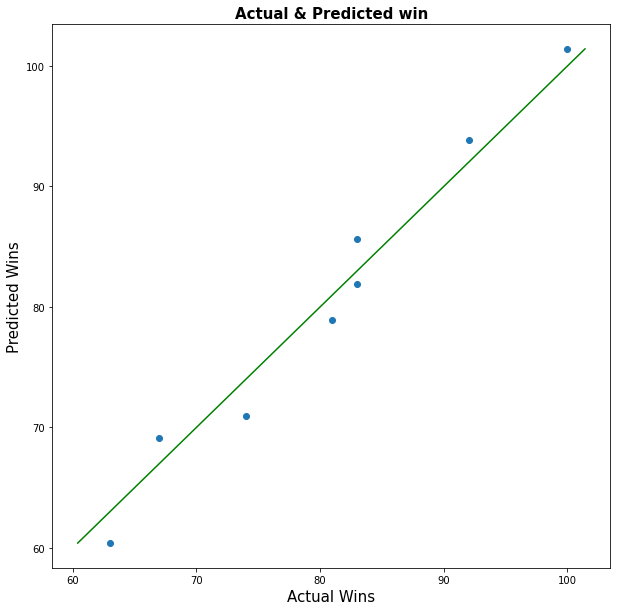

In [104]:
# Checking variation of actual test data and predicted data
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred)
plt1 = max(max( y_pred), max(y_test))
plt2 = min(min( y_pred), min(y_test))
plt.plot([plt1, plt2], [plt1, plt2], 'g')
plt.xlabel("Actual Wins", fontsize= 15)
plt.ylabel("Predicted Wins",fontsize= 15)
plt.title("Actual & Predicted win" , fontsize= 15, fontweight= 'bold')
plt.show()

Here green line represents the actual win and blue dots are the predicted win.

# Saving the model

In [100]:
import pickle
pickle.dump(lin_reg, open("Baseball_Prediction", "wb"))
load_Baseball_Prediction= pickle.load(open("Baseball_Prediction", "rb"))

In [102]:
y_pred = load_Baseball_Prediction.predict(x_test)

y_test = np.array(y_test)
data_prediction_by_model = pd.DataFrame()
data_prediction_by_model["Predicted Values"] = y_pred
data_prediction_by_model["Actual Values"] = y_test
data_prediction_by_model.sample(n=6)

,Predicted Values,Actual Values
3,101.413775,100
6,69.089397,67
7,70.908998,74
2,60.400565,63
0,85.664409,83
1,78.955308,81


All the values are near to the actual values that means Linear Regression is best model for this dataset.